# **WARNING : pada topik ini akan ada beberapa kata-kata *bullying* yang agak kasar. Akan tetapi saya meneliti topik ini karena ingin mencoba bidang penelitian baru yaitu di sosial (socioeconomy)**

**Link Hugging Face : https://huggingface.co/spaces/evanderin/P2M2_FTDS-RMT17_Evan_Derin_Ihsanudin**

# 1 - Introduction

- Nama : Evan Derin Ihsanudin

- Batch : FTDS-017-RMT

- Dataset : `cyberbullying_tweets` (https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification)

*Dataset* ini berisi informasi mengenai tweet dari setiap akun dan tipe dari tweet tersebut. Tipe tweet dibagi menjadi 5 yaitu *religion*, *age*, *gender*, *ethnicity* dan *not cyberbullying*

- Latar Belakang Objective : 

Seiring dengan penggunaan media sosial yang semakin lazim di setiap kelompok usia, sebagian besar masyarakat mengandalkan media sosial untuk komunikasi sehari-hari. Dengan penggunaan media sosial yang semakin *intens* maka menyebabkan tingkat *cyberbullying* meningkat serta dapat berdampak pada siapapun. Pada tanggal 15 April 2020, UNICEF mengeluarkan jurnal penelitian yang menyatakan bahwa tingkat *cyberbullying* meningkat semenjak ada COVID-19. Karena COVID-19 meningkatkan waktu di depan media sosial dan mengurangi interaksi sosial secara langsung. Secara statistik *cyberbullying* meningkat sejumlah 36,5% pada siswa SMP dan SMA. 87% dari korban *cyberbullying* mengalami penurunan di nilai akademik dan beberapa mengalami depresi hingga keinginan untuk bunuh diri. Oleh karena itu perlu adanya tindakan untuk mencegah *cyberbullying*, salah satunya dengan mendeteksi tweet yang menandakan adanya *cyberbullying* dan memberi *redflag* pada tweet tersebut. **Sehingga dibutuhkan model klasifikasi tweet yang optimal** (https://www.unicef.org/press-releases/children-increased-risk-harm-online-during-global-covid-19-pandemic)


- Objective : 
    
    1. Mengetahui karakteristik *tweet* dari setiap kategori 
    2. Membuat, menguji dan memilih model Natural Language Processing yang memiliki performa optimal untuk mem-prediksi jenis tweet dari akun dengan harapan untuk memberi *red flag* pada tweet tersebut sehingga mengurangi tingkat *cyber bullying*
    3. Memberikan rekomendasi *improvement* serta saran pencegahan untuk mengurangi tingkat *cyberbullying*

# 2 - Import Libraries

Libraries adalah *package* python yang digunakan untuk membantu mempersingkat beberapa proses. Library ini nantinya akan saya gunakan untuk kebutuhan *import data*, *cleaning data*, analisis data, visualisasi data, pembuatan model dan pengujian model.

In [151]:
# Library Pengolahan Data
import numpy as np
import pandas as pd

# Library Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Library Split Test dan Train
from sklearn.model_selection import train_test_split

# Library Pre-Processing
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.utils import to_categorical

# Library wordcloud
from wordcloud import WordCloud

# Library Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Dropout, Activation, LSTM, GRU, TextVectorization, Embedding
from tensorflow.keras import Model 
import tensorflow_hub as hub


# Library Evaluasi
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix, roc_auc_score 
from collections import Counter


# 3 - Data Loading

Setelah import *library* selanjutnya adalah *Data Loading*. *Data Loading* adalah proses memasukkan data ke dalam python.
Dataset yang saya gunakan adalah data `cyberbullying_tweets` (https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification)

Import data menggunakan bantuan pandas

In [8]:
# Import data syntax pd.read_csv kemudian assign ke variabel 'df' agar memudahkan pemanggilan
df = pd.read_csv('cyberbullying_tweets.csv')

Selanjutnya saya akan menampilkan 10 data teratas dan 10 data terakhir

In [9]:
# Menampilkan 10 data teratas
df.head(10)

tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying
5  @Raja5aab @Quickieleaks Yes, the test of god i...  not_cyberbullying
6  Itu sekolah ya bukan tempat bully! Ga jauh kay...  not_cyberbullying
7  Karma. I hope it bites Kat on the butt. She is...  not_cyberbullying
8       @stockputout everything but mostly my priest  not_cyberbullying
9  Rebecca Black Drops Out of School Due to Bully...  not_cyberbullying

In [10]:
# Menampilkan 10 data terakhir
df.tail(10)

tweet_text cyberbullying_type
47682  But... he’s right. Atlanta is full of so calle...          ethnicity
47683  Black is a color . African American is a Cultu...          ethnicity
47684  After black soldiers fought in WWI, many of th...          ethnicity
47685  @KeithBishop64 Very true. It was a nice show t...          ethnicity
47686  @YourFavWhiteGuy shut the fuck upAbout your du...          ethnicity
47687  Black ppl aren't expected to do anything, depe...          ethnicity
47688  Turner did not withhold his disappointment. Tu...          ethnicity
47689  I swear to God. This dumb nigger bitch. I have...          ethnicity
47690  Yea fuck you RT @therealexel: IF YOURE A NIGGE...          ethnicity
47691  Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...          ethnicity

Selanjutnya mengecek informasi *dataset*

In [11]:
# Mengecek informasi dataset dengan .info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


Dari informasi diatas dapat disimpulkan bahwa :
- Tidak terdapat data *null*
- Terdapat 2 *feature* yaitu `tweet_text` dan `cyberbullying_type`
- Terdapat 47.692 data *tweet*

Kemudian saya akan coba cek *duplicate value*

In [12]:
# Cek Value Duplikat
df.duplicated().sum()

36

Terdapat 36 duplikat *value*, saya akan *drop* data yang duplikat

In [13]:
# Drop data duplikat pada df
df.drop_duplicates(inplace=True)

In [14]:
# Cek Ulang Value Duplikat
df.duplicated().sum()

0

Kemudian saya akan coba cek *unique value* dari jenis tweet

In [15]:
# Cek Unique Value dari jenis tweet
df['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

Terdapat 6 kategori *cyberbullying* tweet yaitu

- *Not Cyberbullying*
- *Gender*
- *Religion*
- *Other Cyberbullying*
- *Age*
- *Ethnicity*

# 4 - Exploratory Data Analysis (Before Pre-Processing)

Selanjutnya adalah EDA sebelum *Pre-Processing*. Sebelumnya saya akan *copy* dataset ke `df_eda` agar semisal jika saya akan melakukan perubahan pada *dataset* maka *dataset* asli tidak berubah

In [16]:
# Copy ke dataset khusus eda
df_eda = df.copy()

Kemudian saya akan coba print beberapa tweet untuk mengetahui pola kalimat

In [17]:
# Print sample tweet
pd.set_option('display.width', None)
sample_not_bullying = df_eda[df_eda['cyberbullying_type']=='not_cyberbullying'].sample(n=5)
sample_gender = df_eda[df_eda['cyberbullying_type']=='gender'].sample(n=5)
sample_religion = df_eda[df_eda['cyberbullying_type']=='religion'].sample(n=5)
sample_other = df_eda[df_eda['cyberbullying_type']=='other_cyberbullying'].sample(n=5)
sample_age = df_eda[df_eda['cyberbullying_type']=='age'].sample(n=5)
sample_ethnicity = df_eda[df_eda['cyberbullying_type']=='ethnicity'].sample(n=5)


# Print Sample Not Bullying
print('Sample Not Bullying')
print('-'*100)
for i in range(0,5):
    print(sample_not_bullying.iloc[i,0])
print('-'*100)

# Print Sample Gender Bullying
print('Sample Gender')
print('-'*100)
for i in range(0,5):
    print(sample_gender.iloc[i,0])
print('-'*100)

# Print Sample Religion Bullying
print('Sample Religion')
print('-'*100)
for i in range(0,5):
    print(sample_religion.iloc[i,0])
print('-'*100)

# Print Sample Other Bullying
print('Sample Other')
print('-'*100)
for i in range(0,5):
    print(sample_other.iloc[i,0])
print('-'*100)

# Print Sample Age Bullying
print('Sample Age')
print('-'*100)
for i in range(0,5):
    print(sample_age.iloc[i,0])
print('-'*100)

# Print Sample Ethnicity Bullying
print('Sample Ethnicity')
print('-'*100)
for i in range(0,5):
    print(sample_ethnicity.iloc[i,0])
print('-'*100)


Sample Not Bullying
----------------------------------------------------------------------------------------------------
Sério, tem que pessoas que pedem para sofrer Bullying não é possível !
Frio é bullying contra os solteiros. http://t.co/18ddqSB
RT @PeerWorker: @freebsdgirl You just lost $10 from crowd funding of your cause.  Choose your battles.
@TheQuinnspiracy PLZ GET URSELF A BLACKMILK SUPERHERO SWIM
RT @Awkward_Duck: Too many asking protests not be disruptive. That's the entire point! We're here to interrupt the status quo, not plan aro…
----------------------------------------------------------------------------------------------------
Sample Gender
----------------------------------------------------------------------------------------------------
I'm sure he calls female co-workers "fucking bitch" all the time
Mitch Marner gets a female dog he calls is Bitch Marner
Valentine's Day is great and all, but I'm holding out my real enthusiasm for Love Day: https://t.co/YlK19wSlk4


Berdasarkan infromasi dapat disimpulkan bahwa :
- Terdapat beberapa *special character* seperti @, # dll pada setiap tipe tweet. Oleh karena itu **special character tidak mempengaruhi klasifikasi tweet**
- Terdapat emoticon seperti :P (emoticon menjulurkan lidah). Untuk *emoticon* sebenarnya dapat menunjukkan emosi dari penulis tweet akan tetapi *emoticon* tidak dapat diproses dalam NLP **oleh karena itu nanti akan saya *handle***
- Terdapat whitespace dan beberapa tanda baca seperti titik, koma pada beberapa tipe tweet. Oleh karena itu **special character tidak mempengaruhi klasifikasi tweet**
- Terdapat beberapa hyperlink pada setiap jenis tweet. Akan tetapi link seharusnya **tidak memliki pengaruh dalam klasifikasi jenis tweet oleh karena itu akan saya *handle***
- Terdapat beberapa tweet yang banyak menggunakan huruf *capitalize*

## 4-1 Persebaran Kategori Tweet

Saya akan membuat *query* untuk menghitung persebaran

In [18]:
# Menghitung count setiap kategori tweet
print(df_eda['cyberbullying_type'].value_counts())

religion               7997
age                    7992
ethnicity              7959
gender                 7948
not_cyberbullying      7937
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64


Kemudian akan saya visualisasikan untuk mempermudah pemahaman

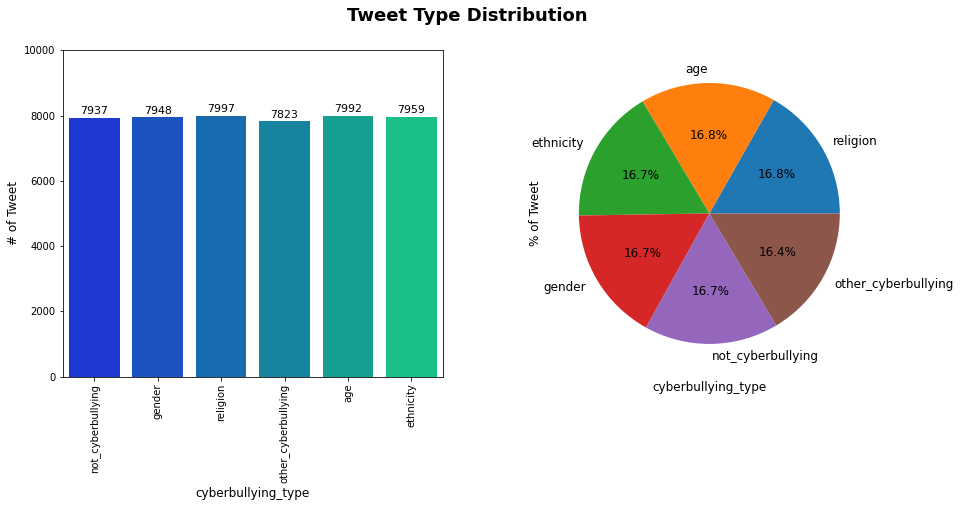

In [19]:
# Membuat visualisasi Distribusi Tweet
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(x='cyberbullying_type', data=df_eda, palette="winter", ax=ax[0])
ax[0].set_xlabel("cyberbullying_type", fontsize= 12)
ax[0].set_ylabel("# of Tweet", fontsize= 12)
fig.suptitle('Tweet Type Distribution', fontsize=18, fontweight='bold')
ax[0].set_ylim(0,10000)
ax[0].tick_params(axis='x', rotation=90)
plt.xlabel("cyberbullying_type", fontsize= 12)
plt.ylabel("# of Tweet", fontsize= 12)

for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+205), ha='center', va='center',fontsize = 11) 

df_eda['cyberbullying_type'].value_counts().plot(kind='pie',autopct='%1.1f%%', textprops = {"fontsize":12})
ax[1].set_ylabel("% of Tweet", fontsize= 12)
plt.show()

Dari informasi diatas dapat disimpulkan bahwa :
- Persebaran jenis tweet merata (di angka 16% atau sekitar 7.800 tweet)

## 4-2 Max dan Rata-Rata Jumlah Kalimat Pada Setiap Tweet dan Kategori

Pada poin ini saya ingin mengetahui :
- Max jumlah kalimat untuk keseluruhan tweet
- Rata-Rata jumlah kalimat untuk keseluruhan tweet
- Max jumlah kalimat untuk setiap category
- Rata-Rata jumlah kalimat untuk setiap category

Saya akan coba menghitung max dan rata-rata jumlah kalimat untuk keseluruhan tweet

In [20]:
# Menghitung jumlah kalimat pada setiap tweet
df_eda['len_sentences'] = df_eda['tweet_text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df_eda

tweet_text cyberbullying_type  \
0      In other words #katandandre, your food was cra...  not_cyberbullying   
1      Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2      @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3      @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4      @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   
...                                                  ...                ...   
47687  Black ppl aren't expected to do anything, depe...          ethnicity   
47688  Turner did not withhold his disappointment. Tu...          ethnicity   
47689  I swear to God. This dumb nigger bitch. I have...          ethnicity   
47690  Yea fuck you RT @therealexel: IF YOURE A NIGGE...          ethnicity   
47691  Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...          ethnicity   

       len_sentences  
0                  2  
1                  2  
2                  2  
3                  2  
4                  2  
...              ...  
47687              3  
47688              2  
47689              4  
47690              1  
47691              2  

[47656 rows x 3 columns]

In [21]:
# Print Max and Average len_sentences

print('Max kalimat pada setiap tweet adalah ', df_eda['len_sentences'].max())
print('Mean kalimat pada setiap tweet adalah ', df_eda['len_sentences'].mean())

Max kalimat pada setiap tweet adalah  66
Mean kalimat pada setiap tweet adalah  2.037959543394326


Dari informasi diatas dapat disimpulkan bahwa :

- *Max* kalimat pada setiap tweet sebelum pre-processing adalah 66 kalimat
- Sedangkan *Mean* kalimat pada setiap tweet sebelum pre-processing adalah 2 kalimat

Kemudian saya akan coba *explore* berdasarkan setiap jenis *tweet*

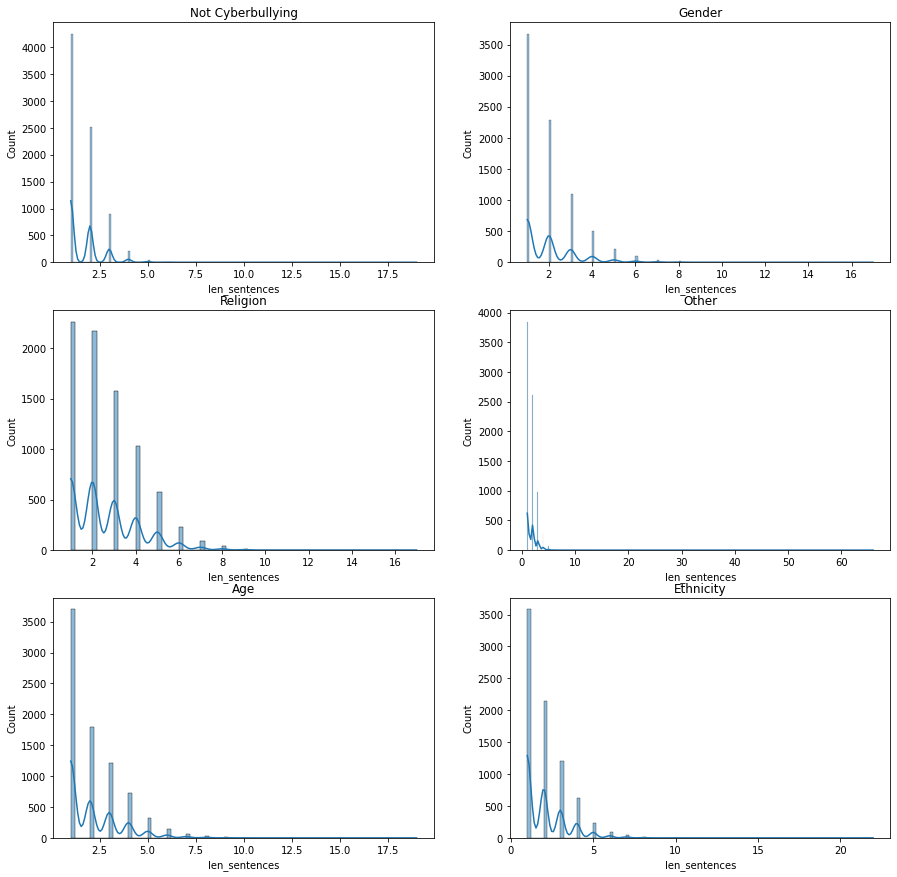

In [22]:
# Plot distribusi kalimat dari setiap kelas tweet
fig, ax =plt.subplots(3,2,figsize=(15,15))
ax[0,0].set_title('Not Cyberbullying')
sns.histplot(df_eda[df_eda['cyberbullying_type'] == 'not_cyberbullying']['len_sentences'], kde=True, ax=ax[0,0])
ax[0,1].set_title('Gender')
sns.histplot(df_eda[df_eda['cyberbullying_type'] == 'gender']['len_sentences'], kde=True, ax=ax[0,1])
ax[1,0].set_title('Religion')
sns.histplot(df_eda[df_eda['cyberbullying_type'] == 'religion']['len_sentences'], kde=True, ax=ax[1,0])
ax[1,1].set_title('Other')
sns.histplot(df_eda[df_eda['cyberbullying_type'] == 'other_cyberbullying']['len_sentences'], kde=True, ax=ax[1,1])
ax[2,0].set_title('Age')
sns.histplot(df_eda[df_eda['cyberbullying_type'] == 'age']['len_sentences'], kde=True, ax=ax[2,0])
ax[2,1].set_title('Ethnicity')
sns.histplot(df_eda[df_eda['cyberbullying_type'] == 'ethnicity']['len_sentences'], kde=True, ax=ax[2,1])

In [23]:
# Print Max dan Average kalimat dari setiap kelas tweet
tweet_type = ['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity']
for i in tweet_type :
    print('Type ', i)
    print('Max kalimat pada setiap tweet adalah ', df_eda[df_eda['cyberbullying_type'] == i]['len_sentences'].max())
    print('Mean kalimat pada setiap tweet adalah ', df_eda[df_eda['cyberbullying_type'] == i]['len_sentences'].mean())
    print('---')

Type  not_cyberbullying
Max kalimat pada setiap tweet adalah  19
Mean kalimat pada setiap tweet adalah  1.6636008567468816
---
Type  gender
Max kalimat pada setiap tweet adalah  17
Mean kalimat pada setiap tweet adalah  1.9874182184197282
---
Type  religion
Max kalimat pada setiap tweet adalah  17
Mean kalimat pada setiap tweet adalah  2.611604351631862
---
Type  other_cyberbullying
Max kalimat pada setiap tweet adalah  66
Mean kalimat pada setiap tweet adalah  1.7708040393710853
---
Type  age
Max kalimat pada setiap tweet adalah  19
Mean kalimat pada setiap tweet adalah  2.135760760760761
---
Type  ethnicity
Max kalimat pada setiap tweet adalah  22
Mean kalimat pada setiap tweet adalah  2.0497549943460234
---


Dari informasi diatas dapat disimpulkan bahwa :
- Pada setiap jenis tweet, jumlah kalimat terdistribusi paling banyak pada 2 kalimat kebawah
- Jumlah terbanyak kalimat adalah pada tweet dengan jenis `other_cyberbullying` dengan jumlah 66

## 4-3 Max dan Rata-Rata Jumlah Kata Pada Setiap Tweet dan Kategori

Pada poin ini saya ingin mengetahui :
- Max jumlah kata untuk keseluruhan tweet
- Rata-Rata jumlah kata untuk keseluruhan tweet
- Max jumlah kata untuk setiap category
- Rata-Rata jumlah kata untuk setiap category

Saya akan coba menghitung max dan rata-rata jumlah kata untuk keseluruhan tweet

In [24]:
# Menghitung jumlah kata pada setiap tweet
df_eda['len_words'] = df_eda['tweet_text'].apply(lambda x: len(nltk.word_tokenize(x)))
df_eda

tweet_text cyberbullying_type  \
0      In other words #katandandre, your food was cra...  not_cyberbullying   
1      Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2      @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3      @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4      @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   
...                                                  ...                ...   
47687  Black ppl aren't expected to do anything, depe...          ethnicity   
47688  Turner did not withhold his disappointment. Tu...          ethnicity   
47689  I swear to God. This dumb nigger bitch. I have...          ethnicity   
47690  Yea fuck you RT @therealexel: IF YOURE A NIGGE...          ethnicity   
47691  Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...          ethnicity   

       len_sentences  len_words  
0                  2         13  
1                  2         25  
2                  2         12  
3                  2         23  
4                  2         22  
...              ...        ...  
47687              3         49  
47688              2         53  
47689              4         29  
47690              1         19  
47691              2         18  

[47656 rows x 4 columns]

In [25]:
# Print Max and Average len_words

print('Max kata pada setiap tweet adalah ', df_eda['len_words'].max())
print('Mean kata pada setiap tweet adalah ', df_eda['len_words'].mean())

Max kata pada setiap tweet adalah  1021
Mean kata pada setiap tweet adalah  28.778474903474905


Dari informasi diatas dapat disimpulkan bahwa :

- *Max* kata pada setiap tweet sebelum pre-processing adalah 1.021 kata
- Sedangkan *Mean* kata pada setiap tweet sebelum pre-processing adalah 28 kata

Kemudian saya akan coba *explore* berdasarkan setiap jenis *tweet*

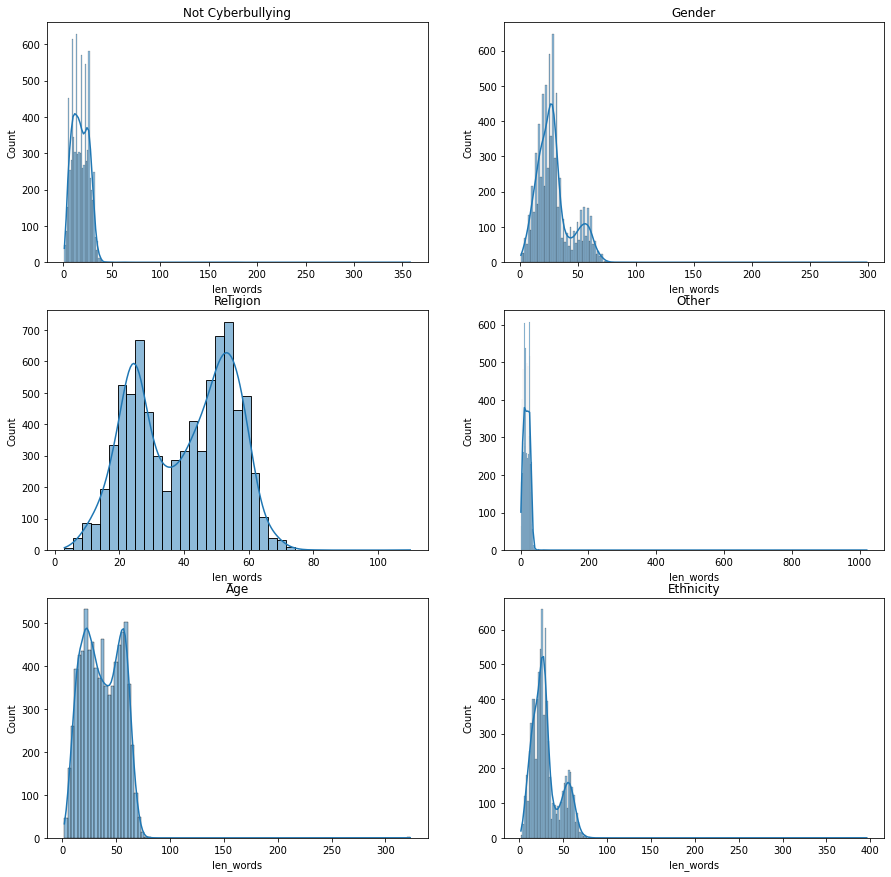

In [27]:
# Plot distribusi kalimat dari setiap kelas tweet
fig, ax =plt.subplots(3,2,figsize=(15,15))
ax[0,0].set_title('Not Cyberbullying')
sns.histplot(df_eda[df_eda['cyberbullying_type'] == 'not_cyberbullying']['len_words'], kde=True, ax=ax[0,0])
ax[0,1].set_title('Gender')
sns.histplot(df_eda[df_eda['cyberbullying_type'] == 'gender']['len_words'], kde=True, ax=ax[0,1])
ax[1,0].set_title('Religion')
sns.histplot(df_eda[df_eda['cyberbullying_type'] == 'religion']['len_words'], kde=True, ax=ax[1,0])
ax[1,1].set_title('Other')
sns.histplot(df_eda[df_eda['cyberbullying_type'] == 'other_cyberbullying']['len_words'], kde=True, ax=ax[1,1])
ax[2,0].set_title('Age')
sns.histplot(df_eda[df_eda['cyberbullying_type'] == 'age']['len_words'], kde=True, ax=ax[2,0])
ax[2,1].set_title('Ethnicity')
sns.histplot(df_eda[df_eda['cyberbullying_type'] == 'ethnicity']['len_words'], kde=True, ax=ax[2,1])

In [28]:
# Print Max dan Average Kata dari setiap kelas tweet
tweet_type = ['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity']
for i in tweet_type :
    print('Type ', i)
    print('Max kata pada setiap tweet adalah ', df_eda[df_eda['cyberbullying_type'] == i]['len_words'].max())
    print('Mean kata pada setiap tweet adalah ', df_eda[df_eda['cyberbullying_type'] == i]['len_words'].mean())
    print('---')

Type  not_cyberbullying
Max kata pada setiap tweet adalah  358
Mean kata pada setiap tweet adalah  17.659947083280837
---
Type  gender
Max kata pada setiap tweet adalah  299
Mean kata pada setiap tweet adalah  29.29768495218923
---
Type  religion
Max kata pada setiap tweet adalah  110
Mean kata pada setiap tweet adalah  39.58384394147805
---
Type  other_cyberbullying
Max kata pada setiap tweet adalah  1021
Mean kata pada setiap tweet adalah  18.408155439089864
---
Type  age
Max kata pada setiap tweet adalah  323
Mean kata pada setiap tweet adalah  37.040665665665664
---
Type  ethnicity
Max kata pada setiap tweet adalah  396
Mean kata pada setiap tweet adalah  30.387485865058423
---


Dari informasi diatas dapat disimpulkan bahwa :
- Rata-Rata kata pada `not_bullying` cenderung lebih rendah dari pada kategori lain (berkisar pada 17 kata)
- Rata-Rata kata pada `religion` lebih tinggi dari pada kategori lain dengan kisaran 39 kata
- Jumlah maksimal kata paling banyak adalah pada tipe tweet `other` dengan jumlah 1.021 kata
- Pada setiap jenis tweet, jumlah kata **terdistribusi banyak (terpusat)** pada 20-40 kata

## 4-4 Wordcloud Pada Setiap Tweet dan Kategori

Pada poin ini saya akan coba melihat *workcloud* pada semua tweet kemudian akan saya spesifikkan untuk setiap kategori

### 1. Wordcloud All Tweet

Saya akan coba visualisasikan *wordcloud* untuk *All Tweet*

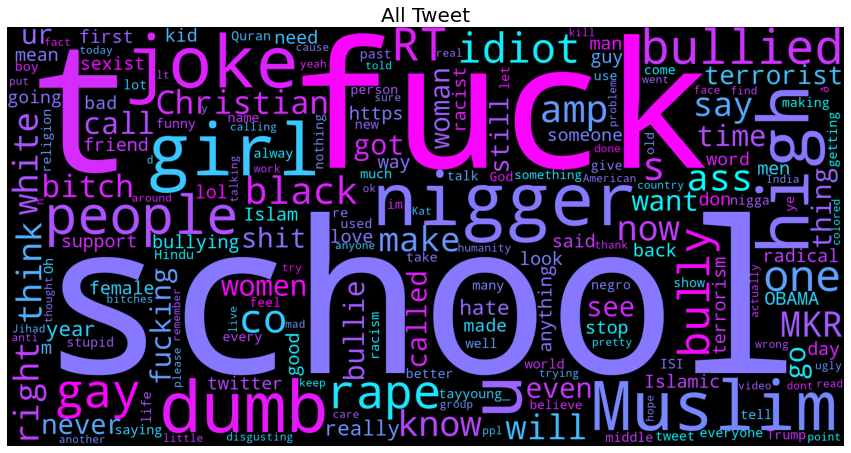

In [29]:
# Membuat wordcloud
text_all = df_eda.tweet_text.values
cloud_all = WordCloud(background_color='black',colormap="cool",collocations=False,width=2000,height=1000).generate(" ".join(text_all))

# Menampilkan wordcloud
plt.figure(figsize=(15,10))
plt.axis('off')
plt.title("All Tweet",fontsize=20)
plt.imshow(cloud_all)

Selanjutnya saya akan membuat visualisasi top 20 highest untuk memudahkan pemahaman

In [233]:
# Membuat top 20 highest
df_eda['tweet_list'] = df_eda['tweet_text'].apply(lambda x:str(x).split())
high_all = Counter([item for sublist in df_eda['tweet_list'] for item in sublist])
tweet_high_all = pd.DataFrame(high_all.most_common(20))
tweet_high_all.columns = ['Words','Count']
tweet_high_all.style.background_gradient(cmap='Greens')

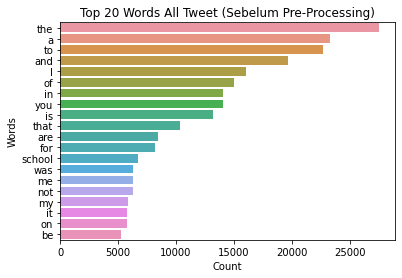

In [235]:
# Membuat visualisasi top 20
sns.barplot(x='Count', y='Words', data =tweet_high_all, orientation= 'horizontal').set(title= 'Top 20 Words All Tweet (Sebelum Pre-Processing)')
plt.show()

Dari informasi diatas dapat disimpulkan bahwa :
- Pada tipe *All Tweet* kata yang paling sering digunakan adalah *school*, *fuck*, *nigger*, *dumb*, *joke* dan muslim
- Terdapat *stopwords* **rt, mkr, didn, bc, n, m, im, ll, y, ve, u, ur, don, t, s, y, ye, na, re, lil, d**
- Terdapat *website* karena ada *word* https
- Dominan pada *lowercase*
- Terdapat *verb + ing/ed dan v2/v3* seperti talking, fucking, bullied, making, trying, going, getting, dan went

### 2. Wordcloud Tweet Type `not_cyberbullying`

Saya akan coba visualisasikan *wordcloud* untuk *Not Cyberbullying*

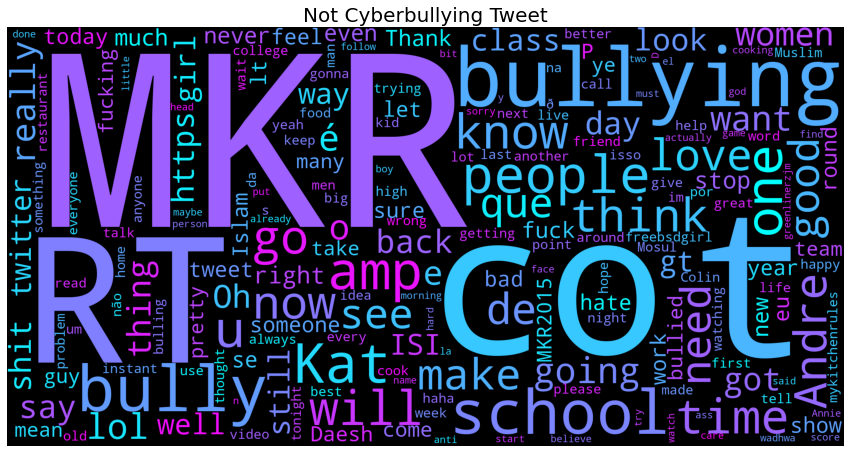

In [30]:
# Membuat wordcloud
text_not_cyberbullying = df_eda[df_eda['cyberbullying_type'] == 'not_cyberbullying'].tweet_text.values
cloud_not_cyberbullying = WordCloud(background_color='black',colormap="cool",collocations=False,width=2000,height=1000).generate(" ".join(text_not_cyberbullying))

# Menampilkan wordcloud
plt.figure(figsize=(15,10))
plt.axis('off')
plt.title("Not Cyberbullying Tweet",fontsize=20)
plt.imshow(cloud_not_cyberbullying)

In [236]:
# Memisahkan df eda sesuai tipe untuk visualisasi
not_cyberbullying_type_eda = df_eda[df_eda['cyberbullying_type']=='not_cyberbullying']
gender_type_eda = df_eda[df_eda['cyberbullying_type']=='gender']
religion_type_eda = df_eda[df_eda['cyberbullying_type']=='religion']
other_cyberbullying_type_eda = df_eda[df_eda['cyberbullying_type']=='other_cyberbullying']
age_type_eda = df_eda[df_eda['cyberbullying_type']=='age']
ethnicity_type_eda = df_eda[df_eda['cyberbullying_type']=='ethnicity']

Selanjutnya saya akan membuat visualisasi top 20 highest untuk memudahkan pemahaman

In [237]:
# Membuat top 20 highest
high_not_cyberbullying = Counter([item for sublist in not_cyberbullying_type_eda['tweet_list'] for item in sublist])
tweet_high_not_cyberbullying = pd.DataFrame(high_not_cyberbullying.most_common(20))
tweet_high_not_cyberbullying.columns = ['Words','Count']
tweet_high_not_cyberbullying.style.background_gradient(cmap='Greens')

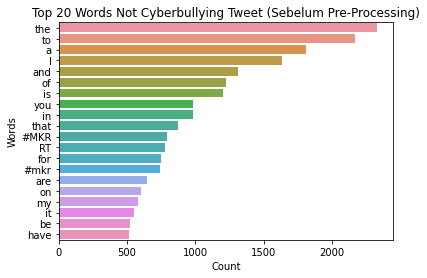

In [238]:
# Membuat visualisasi top 20
sns.barplot(x='Count', y='Words', data =tweet_high_not_cyberbullying, orientation= 'horizontal').set(title= 'Top 20 Words Not Cyberbullying Tweet (Sebelum Pre-Processing)')
plt.show()

Dari informasi diatas dapat disimpulkan bahwa :
- Pada tipe *Not Cyberbullying* kata yang paling sering digunakan adalah MKR, RT, *bully, bullying,* t dan CO
- Terdapat *stopwords* **RT, MKR, el, y, P,  um, s, la, n, na, por, like, andre dan da**
- Dominan pada *lowercase*
- Terdapat *website* karena ada *word* https
- Terdapat *verb + ing/ed dan v2/v3* seperti trying, getting, bulling, bullied, dan thought 

### 3. Wordcloud Tweet Type `gender`

Saya akan coba visualisasikan *wordcloud* untuk *Gender*

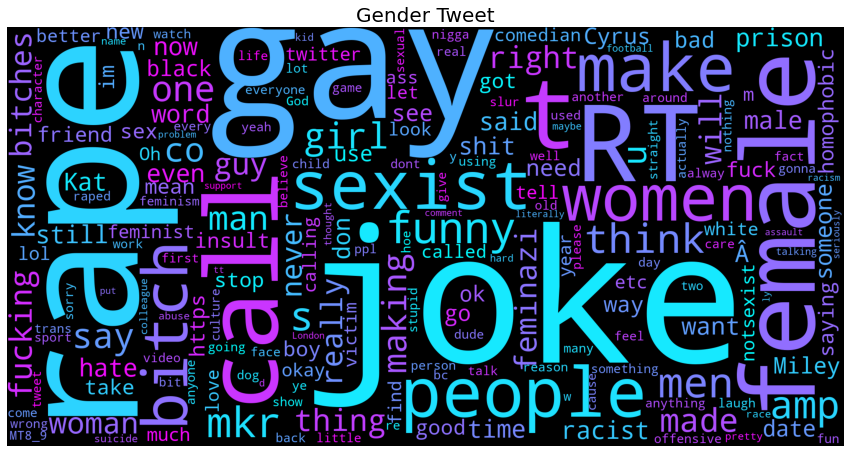

In [31]:
# Membuat wordcloud
text_gender = df_eda[df_eda['cyberbullying_type'] == 'gender'].tweet_text.values
cloud_gender = WordCloud(background_color='black',colormap="cool",collocations=False,width=2000,height=1000).generate(" ".join(text_gender))

# Menampilkan wordcloud
plt.figure(figsize=(15,10))
plt.axis('off')
plt.title("Gender Tweet",fontsize=20)
plt.imshow(cloud_gender)

Selanjutnya saya akan membuat visualisasi top 20 highest untuk memudahkan pemahaman

In [239]:
# Membuat top 20 highest
high_gender = Counter([item for sublist in gender_type_eda['tweet_list'] for item in sublist])
tweet_high_gender = pd.DataFrame(high_gender.most_common(20))
tweet_high_gender.columns = ['Words','Count']
tweet_high_gender.style.background_gradient(cmap='Greens')

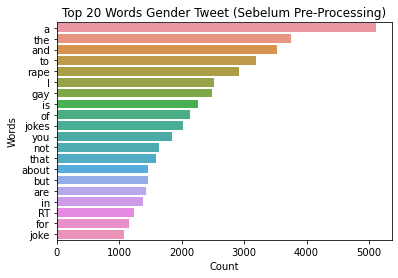

In [240]:
# Membuat visualisasi top 20
sns.barplot(x='Count', y='Words', data =tweet_high_gender, orientation= 'horizontal').set(title= 'Top 20 Words Gender Tweet (Sebelum Pre-Processing)')
plt.show()

Dari informasi diatas dapat disimpulkan bahwa :
- Pada tipe *Gender* kata yang paling sering digunakan adalah *joke, rape, female, RT, gay, call, female* dan *make*
- Terdapat *stopwords* **ye, m, n, ly, tt, y, w, m, dan t**
- Dominan pada *lowercase*
- Terdapat *website* karena ada *word* https
- Terdapat *verb + ing/ed dan v2/v3* seperti talking, said, fucking, dan funny

### 4. Wordcloud Tweet Type `religion`

Saya akan coba visualisasikan *wordcloud* untuk *Religion*

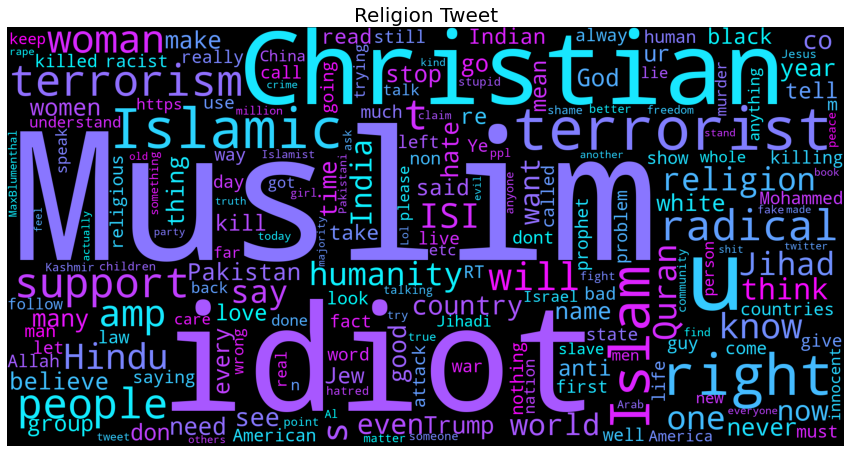

In [32]:
# Membuat wordcloud
text_religion = df_eda[df_eda['cyberbullying_type'] == 'religion'].tweet_text.values
cloud_religion = WordCloud(background_color='black',colormap="cool",collocations=False,width=2000,height=1000).generate(" ".join(text_religion))

# Menampilkan wordcloud
plt.figure(figsize=(15,10))
plt.axis('off')
plt.title("Religion Tweet",fontsize=20)
plt.imshow(cloud_religion)

Selanjutnya saya akan membuat visualisasi top 20 highest untuk memudahkan pemahaman

In [241]:
# Membuat top 20 highest
high_religion = Counter([item for sublist in religion_type_eda['tweet_list'] for item in sublist])
tweet_high_religion = pd.DataFrame(high_religion.most_common(20))
tweet_high_religion.columns = ['Words','Count']
tweet_high_religion.style.background_gradient(cmap='Greens')

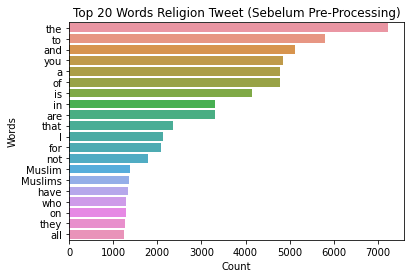

In [242]:
# Membuat visualisasi top 20
sns.barplot(x='Count', y='Words', data =tweet_high_religion, orientation= 'horizontal').set(title= 'Top 20 Words Religion Tweet (Sebelum Pre-Processing)')
plt.show()

Dari informasi diatas dapat disimpulkan bahwa :
- Pada tipe *Religion* kata yang paling sering digunakan adalah muslim, *idiot, christian* dan *terrorist*
- Terdapat *stopwords* **t, co, al, m, dan n**
- Terdapat website karena ada *word* https
- Dominan pada *lowercase*
- Terdapat *verb + ing/ed dan v2/v3* seperti killing, talking, trying, said, killed, dan countries 

### 5. Wordcloud Tweet Type `other_cyberbullying`

Saya akan coba visualisasikan *wordcloud* untuk *Other Cyberbullying*

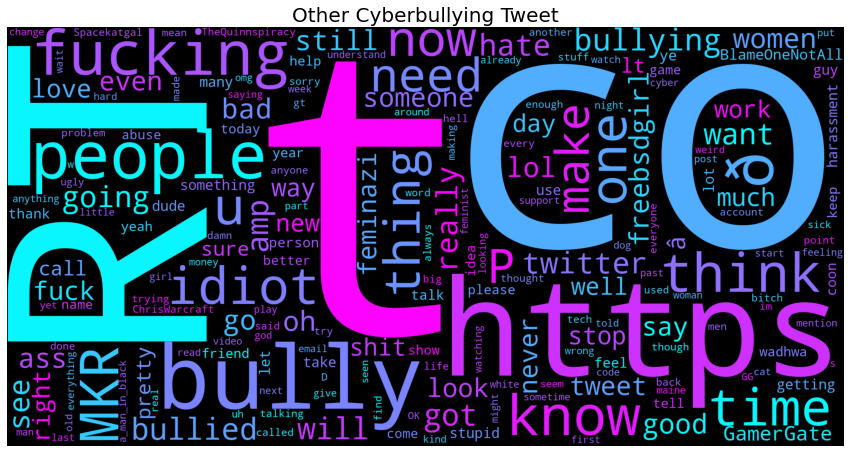

In [33]:
# Membuat wordcloud
text_other_cyberbullying = df_eda[df_eda['cyberbullying_type'] == 'other_cyberbullying'].tweet_text.values
cloud_other_cyberbullying = WordCloud(background_color='black',colormap="cool",collocations=False,width=2000,height=1000).generate(" ".join(text_other_cyberbullying))

# Menampilkan wordcloud
plt.figure(figsize=(15,10))
plt.axis('off')
plt.title("Other Cyberbullying Tweet",fontsize=20)
plt.imshow(cloud_other_cyberbullying)

Selanjutnya saya akan membuat visualisasi top 20 highest untuk memudahkan pemahaman

In [243]:
# Membuat top 20 highest
high_other_cyberbullying = Counter([item for sublist in other_cyberbullying_type_eda['tweet_list'] for item in sublist])
tweet_high_other_cyberbullying = pd.DataFrame(high_other_cyberbullying.most_common(20))
tweet_high_other_cyberbullying.columns = ['Words','Count']
tweet_high_other_cyberbullying.style.background_gradient(cmap='Greens')

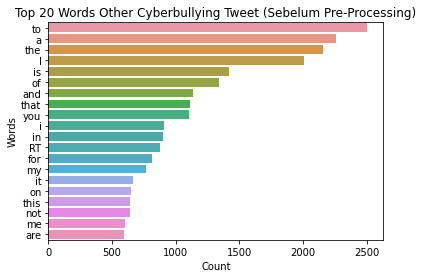

In [244]:
# Membuat visualisasi top 20
sns.barplot(x='Count', y='Words', data =tweet_high_other_cyberbullying, orientation= 'horizontal').set(title= 'Top 20 Words Other Cyberbullying Tweet (Sebelum Pre-Processing)')
plt.show()

Dari informasi diatas dapat disimpulkan bahwa :
- Pada tipe *Other Cyberbullying* kata yang paling sering digunakan adalah CO, RT, T dan https
- Terdapat *stopwords* **co, a, d, ye, s, na, re, lil, d, na dan le**
- Terdapat *website* karena ada *word* https
- Dominan pada *lowercase*
- Terdapat simbol matematika gamma
- Terdapat *verb + ing/ed dan v2/v3* seperti might, talking, getting, going, bullied, watching, dan feeling

### 6. Wordcloud Tweet Type `age`

Saya akan coba visualisasikan *wordcloud* untuk *age*

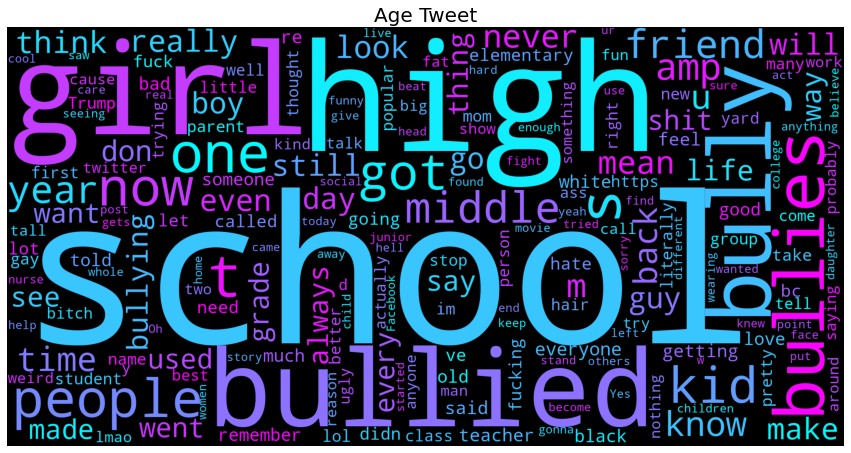

In [34]:
# Membuat wordcloud
text_age = df_eda[df_eda['cyberbullying_type'] == 'age'].tweet_text.values
cloud_age = WordCloud(background_color='black',colormap="cool",collocations=False,width=2000,height=1000).generate(" ".join(text_age))

# Menampilkan wordcloud
plt.figure(figsize=(15,10))
plt.axis('off')
plt.title("Age Tweet",fontsize=20)
plt.imshow(cloud_age)

Selanjutnya saya akan membuat visualisasi top 20 highest untuk memudahkan pemahaman

In [245]:
# Membuat top 20 highest
high_age = Counter([item for sublist in age_type_eda['tweet_list'] for item in sublist])
tweet_high_age = pd.DataFrame(high_age.most_common(20))
tweet_high_age.columns = ['Words','Count']
tweet_high_age.style.background_gradient(cmap='Greens')

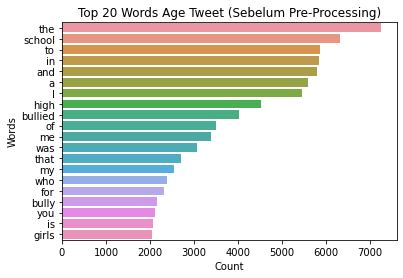

In [246]:
# Membuat visualisasi top 20
sns.barplot(x='Count', y='Words', data =tweet_high_age, orientation= 'horizontal').set(title= 'Top 20 Words Age Tweet (Sebelum Pre-Processing)')
plt.show()

Dari informasi diatas dapat disimpulkan bahwa :
- Pada tipe *Age* kata yang paling sering digunakan adalah *school*, *girl*, *high*, *bullied* dan *bully*
- Terdapat *stopwords* **re, w, d, dan ve**
- Dominan pada *lowercase*
- Terdapat *verb + ing/ed dan v2/v3* seperti going, bullying, saying, dan called

### 7. Wordcloud Tweet Type `ethnicity`

Saya akan coba visualisasikan *wordcloud* untuk *ethnicity*

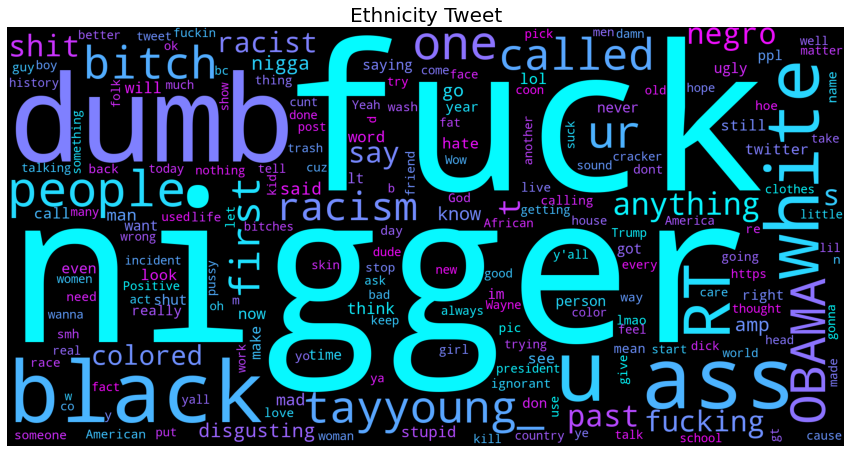

In [35]:
# Membuat wordcloud
text_ethnicity = df_eda[df_eda['cyberbullying_type'] == 'ethnicity'].tweet_text.values
cloud_ethnicity = WordCloud(background_color='black',colormap="cool",collocations=False,width=2000,height=1000).generate(" ".join(text_ethnicity))

# Menampilkan wordcloud
plt.figure(figsize=(15,10))
plt.axis('off')
plt.title("Ethnicity Tweet",fontsize=20)
plt.imshow(cloud_ethnicity)

Selanjutnya saya akan membuat visualisasi top 20 highest untuk memudahkan pemahaman

In [247]:
# Membuat top 20 highest
high_ethnicity = Counter([item for sublist in ethnicity_type_eda['tweet_list'] for item in sublist])
tweet_high_ethnicity = pd.DataFrame(high_ethnicity.most_common(20))
tweet_high_ethnicity.columns = ['Words','Count']
tweet_high_ethnicity.style.background_gradient(cmap='Greens')

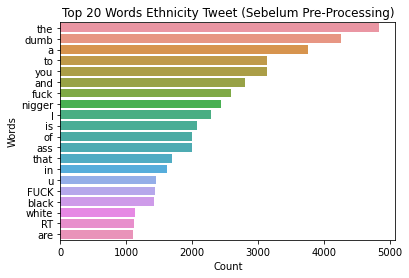

In [248]:
# Membuat visualisasi top 20
sns.barplot(x='Count', y='Words', data =tweet_high_ethnicity, orientation= 'horizontal').set(title= 'Top 20 Words Ethnicity Tweet (Sebelum Pre-Processing)')
plt.show()

Dari informasi diatas dapat disimpulkan bahwa :
- Pada tipe *Ethnicity* kata yang paling sering digunakan adalah *nigger, fuck, dumb, black* dan *white*
- Terdapat *stopwords* **RT, yo, re, m, n, ye, d, gt, w, lt,nikki, lmao, miley, wan, gon dan t**
- Dominan pada *lowercase*
- Terdapat *verb + ing* seperti disgusting, trying, getting, calling, dan talking

# 5 - Data Pre-Processing

Selanjutnya adalah Data Pre-Processing

## 5-1 Text Pre-Processing

Berdasarkan EDA maka saya menerapkan *text pre-processing* sebagai berikut :

- Convert to *lowercase*

    Hal ini saya lakukan karena, pada poin EDA bisa dilihat bahwa semua kategori tweet di-dominasi oleh *lowercase* oleh karena itu seharusnya *uppercase* tidak mempengaruhi klasifikasi tweet

- Remove Website

    Berdasarkan *personal judgement* dan EDA seharusnya *website* tidak mempengaruhi klasifikasi tweet. Selain itu *website* juga terdapat pada beberapa kategori tweet

- Remove *Stopwords*

    Pada poin EDA bisa dilihat bahwa semua kategori memiliki *stopwords* yang mirip dan cenderung sama. Oleh karena itu *stopwords* tidak mempengaruhi klasifikasi tweet

- Remove Emoticon dan Simbol Matematika

    Berdasarkan EDA, bisa dilihat bahwa terdapat emoji pada beberapa tweet. untuk *emoticon* sebenarnya dapat menunjukkan emosi dari penulis tweet akan tetapi *emoticon* tidak dapat diproses dalam NLP oleh karena itu akan saya *remove*. Kemudian simbol matematika seperti gamma pada poin EDA, juga seharusnya tidak berpengaruh terhadap klasifikasi tweet

- Remove *Whitespace*

    Berdasarkan *personal judgement, whitespace* tidak mempengaruhi klasifikasi tweet

- Remove *Mention*

    Berdasarkan *personal judgement*, seharusnya *mention* tidak berpengaruh terhadap klasifikasi karena *mention* hanya berfungsi sebagai *identifier* dari tweet yang dituju
    
- Remove *Hashtag*

    Pada EDA bisa diketahui jika setiap jenis *tweet* terdapat *hashtag*, oleh karena itu *hashtag* tidak mempunyai pengaruh terhadap klasifikasi tweet

- Remove *new line*

    Berdasarkan *personal judgement*, *new line* tidak mempengaruhi klasifikasi tweet

- Lemmatizer

    Bedasarkan EDA, tedapat V2/V3/V+ing seperti **disgusting, trying, getting, called, might, countries, said, thought, went** dll. Seperti *went* tidak dapat diubah menjadi *go* jika memakai *stemming* oleh karena itu saya menggunakan *lemmatizer*. Kemudian menurut *personal judgement* saya, bentuk *past tense/present tense/future present tense dll* tidak mempengaruhi klasifikasi tweet karena *tense* hanya berpengaruh ke waktu (akan tetapi maknanya tetap)
    
- Remove Additional Stopwords (seperti Retweet (RT), MKR dll)

    Berdasarkan EDA terdapat beberapa *stopwords* tambahan seperti **'rt', 'mkr', 'didn', 'bc', 'n', 'm', 'im', 'll', 'y', 've', 'u', 'ur', 'don','p', 't', 's', 'aren', 'kp', 'o', 'kat', 'de', 're', 'amp', 'will', 'wa', 'e', 'like'**. Saya akan *remove stopwords* ini karena tidak memiliki pengaruh terhadap klasifikasi tweet 

- Word Tokenizer

    Saya menggunakan *word tokenizer* karena kombinasi dari kalimat sangat banyak sekali, sehingga jika 1 kalimat dijadikan 1 token maka hasil model akan kurang akurat.

Kemudian saya akan definisikan *additional stopwords* sebelum mendefinisikan fungsi *cleaning*

In [36]:
# Additional Stopwords
additional_stopwords = ['rt', 'mkr', 'didn', 'bc', 'n', 'm', 
                  'im', 'll', 'y', 've', 'u', 'ur', 'don', 
                  'p', 't', 's', 'aren', 'kp', 'o', 'kat',
                  'de', 're', 'amp', 'will', 'wa', 'e', 'like', 'andre', 'na', 're', 'lil', 'd', 'na', 'pete', 'annie', 'nikki', 'lmao', 'miley', 'wan', 'gon']

Selanjutnya adalah mendefinisikan fungsi *cleaning*

In [37]:
# Setting stopwords english
stpwds_eng = list(set(stopwords.words('english')))
for i in additional_stopwords:
    stpwds_eng.append(i)

In [38]:
# Membuat fungsi cleaning

cleaning_pattern = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+" # Sumber pattern https://www.kaggle.com/paoloripamonti/twitter-sentiment-analysis
lemmatizer = WordNetLemmatizer()


def text_proses(teks):

    # Mengubah Teks ke Lowercase
    teks = teks.lower()

    # Menghilangkan Link
    teks = re.sub(cleaning_pattern, ' ', teks)

    # Menghilangkan Mention
    teks = re.sub("@[A-Za-z0-9_]+", " ", teks)
  
    # Menghilangkan Hashtag
    teks = re.sub("#[A-Za-z0-9_]+", " ", teks)

    # Menghilangkan \n
    teks = re.sub(r"\\n", " ",teks)

    # Menghilangkan kata dibawah 3 char
    teks = re.sub(r'\b\w{1,3}\b', " ",teks)
  
    # Menghilangkan Whitespace
    teks = teks.strip()

    # Menghilangkan yang Bukan Huruf seperti Emoji, Gamma dll
    teks = re.sub("[^A-Za-z\s']", " ", teks)

    # Menghilangkan double space
    teks = re.sub("\s\s+" , " ", teks)
        
    # Melakukan Tokenisasi
    tokens = word_tokenize(teks)

    # Menghilangkan Stopwords
    teks = ' '.join([word for word in tokens if word not in stpwds_eng])

    # Melakukan Lemmatizer
    teks = lemmatizer.lemmatize(teks)
   

    return teks

Kemudian saya akan coba mengaplikasikannya pada `tweet_text`

In [39]:
# Mengaplikasikan pada tweet_text
df_final = df.copy()
df_final['tweet_processed'] = df_final['tweet_text'].apply(lambda x: text_proses(x))
df_final

tweet_text cyberbullying_type  \
0      In other words #katandandre, your food was cra...  not_cyberbullying   
1      Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2      @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3      @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4      @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   
...                                                  ...                ...   
47687  Black ppl aren't expected to do anything, depe...          ethnicity   
47688  Turner did not withhold his disappointment. Tu...          ethnicity   
47689  I swear to God. This dumb nigger bitch. I have...          ethnicity   
47690  Yea fuck you RT @therealexel: IF YOURE A NIGGE...          ethnicity   
47691  Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...          ethnicity   

                                         tweet_processed  
0                    words katandandre food crapilicious  
1      aussietv white theblock imacelebrityau today s...  
2                           classy whore velvet cupcakes  
3      thanks heads concerned another angry dude twitter  
4      isis account pretending kurdish account islam ...  
...                                                  ...  
47687  black expected anything depended anything free...  
47688  turner withhold disappointment turner called c...  
47689  swear dumb nigger bitch bleach hair reeeeeal f...  
47690  fuck therealexel youre nigger fucking unfollow...  
47691   got ta chill chillshrammy fuck dumb nigger bitch  

[47656 rows x 3 columns]

## 5-2 Target Encoding

Selanjutnya saya akan *encoding* target 

In [40]:
# Melihat Target

df_final['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

Kemudian akan saya ubah target menjadi *numeric*

In [41]:
# Mengubah Target dari String ke dalam Numeric
label_encoder = LabelEncoder()
df_final['label'] = label_encoder.fit_transform(df_final['cyberbullying_type'])
df_final

tweet_text cyberbullying_type  \
0      In other words #katandandre, your food was cra...  not_cyberbullying   
1      Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2      @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3      @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4      @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   
...                                                  ...                ...   
47687  Black ppl aren't expected to do anything, depe...          ethnicity   
47688  Turner did not withhold his disappointment. Tu...          ethnicity   
47689  I swear to God. This dumb nigger bitch. I have...          ethnicity   
47690  Yea fuck you RT @therealexel: IF YOURE A NIGGE...          ethnicity   
47691  Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...          ethnicity   

                                         tweet_processed  label  
0                    words katandandre food crapilicious      3  
1      aussietv white theblock imacelebrityau today s...      3  
2                           classy whore velvet cupcakes      3  
3      thanks heads concerned another angry dude twitter      3  
4      isis account pretending kurdish account islam ...      3  
...                                                  ...    ...  
47687  black expected anything depended anything free...      1  
47688  turner withhold disappointment turner called c...      1  
47689  swear dumb nigger bitch bleach hair reeeeeal f...      1  
47690  fuck therealexel youre nigger fucking unfollow...      1  
47691   got ta chill chillshrammy fuck dumb nigger bitch      1  

[47656 rows x 4 columns]

In [42]:
# Get Label Name
le_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(le_name_mapping)

{'age': 0, 'ethnicity': 1, 'gender': 2, 'not_cyberbullying': 3, 'other_cyberbullying': 4, 'religion': 5}


## 5-3 Split Train-Set, Val-Set & Test-Set

Selanjutnya adalah *split train-set, val-set* dan *test-set*. *Train_val-set* menggunakan 85% data sedangkan *Test-set* menggunakan 15% data. Kemudian *Train_val-set* akan di-split lagi dengan proporsi 85% data *Train-set* dan 15% data *Val-set*. Saya tidak menggunakan *stratified* karena data *balance*

In [43]:
# Split between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(df_final['tweet_processed'], df_final['label'], test_size=0.15, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=10)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (34430,)
Val Size :  (6077,)
Test Size :  (7149,)


## 5-4 Tokenization (untuk persiapan layer vectorization dan embedding)

Selanjutnya adalah tokenization untuk persiapan layer vectorization dan embedding

In [44]:
# Get Vocabularies

Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_val_vec = Vectorize.transform(X_val)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<34430x37906 sparse matrix of type '<class 'numpy.int64'>'
	with 359138 stored elements in Compressed Sparse Row format>

Selanjutnya saya akan mencari jumlah *vocabulary* dan panjang token dalam 1 *document*

In [45]:
# Mencari Jumlah Vocab dan Panjang Token dalam Satu Document

jml_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print("Jumlah vocab : ", jml_vocab)
print("Panjang maksimum kalimat : ", max_sen_len, "kata")

Jumlah vocab :  37906
Panjang maksimum kalimat :  310 kata


## 5-5 Change Target to One Hot Encoding

Kemudian adalah mengubah target menggunakan *One Hot Encoding*

In [46]:
# Mengubah Target ke dalam One Hot Encoding
y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)
y_train_ohe

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

## 5-6 Pipeline Tensorflow

Selanjutnya adalah menyusun pipeline tensorflow sebelum melakukan modelling dan *training*

Selanjutnya saya akan membuat *pipeline tensorflow* sebelum pendefinisian model. Pipeline akan saya susun dengan urutan :

1. Shuffle (Buffer 20% dari len dataset sesuai dengan *pareto principle*)
2. Batch (32)
3. Prefetch -> agar *preparing* dan *training* bisa dilakukan bersamaan

Saya memilih urutan tersebut karena jika urutannya Shuffle-Batch maka data akan di-acak dulu sebelum di-kelompokkan ke dalam *batch*. Kemudian berdasarkan artikel yang saya baca, urutan Shuffle-Batch biasanya digunakan untuk RNN (https://stackoverflow.com/questions/50437234/tensorflow-dataset-shuffle-then-batch-or-batch-then-shuffle, https://stackoverflow.com/questions/49915925/output-differences-when-changing-order-of-batch-shuffle-and-repeat)

Kemudian berdasarkan sumber yang saya baca, saya memilih jumlah *batch* yaitu 32 karena inisialisasi disarankan pada 32/64/128/256 (https://stackoverflow.com/questions/35050753/how-big-should-batch-size-and-number-of-epochs-be-when-fitting-a-model#:~:text=Generally%20batch%20size%20of%2032,b%2Fw%2050%20to%20100)

In [47]:
# Definisi Pipeline Train dan Val
train_pipe = tf.data.Dataset.from_tensor_slices((X_train,y_train_ohe)).shuffle(int(round(len(X_train)*20/100,0))).batch(32).prefetch(tf.data.AUTOTUNE)
val_pipe = tf.data.Dataset.from_tensor_slices((X_val,y_val_ohe)).shuffle(int(round(len(X_val)*20/100,0))).batch(32)


# 6 - Exploratory Data Analysis (After Pre-Processing)

Selanjutnya adalah EDA setelah Pre-Processing. Saya ingin mengetahui efek pre-processing terhadap data, oleh karena itu nantinya akan saya lakukan perbandingan

## 6-1 Max dan Rata-Rata Jumlah Kata Pada Setiap Tweet dan Kategori

Saya tidak menghitung jumlah kalimat karena setelah dilakukan *word* tokenize maka jumlah kalimat pada setiap tipe akan menjadi 1. Pada poin ini saya ingin mengetahui :
- Max jumlah kata untuk keseluruhan tweet
- Rata-Rata jumlah kata untuk keseluruhan tweet
- Max jumlah kata untuk setiap category
- Rata-Rata jumlah kata untuk setiap category

Saya akan coba menghitung max dan rata-rata jumlah kata untuk keseluruhan tweet

In [48]:
# Menghitung jumlah kata pada setiap tweet
df_final['len_words'] = df_final['tweet_processed'].apply(lambda x: len(nltk.word_tokenize(x)))
df_final

tweet_text cyberbullying_type  \
0      In other words #katandandre, your food was cra...  not_cyberbullying   
1      Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2      @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3      @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4      @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   
...                                                  ...                ...   
47687  Black ppl aren't expected to do anything, depe...          ethnicity   
47688  Turner did not withhold his disappointment. Tu...          ethnicity   
47689  I swear to God. This dumb nigger bitch. I have...          ethnicity   
47690  Yea fuck you RT @therealexel: IF YOURE A NIGGE...          ethnicity   
47691  Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...          ethnicity   

                                         tweet_processed  label  len_words  
0                    words katandandre food crapilicious      3          4  
1      aussietv white theblock imacelebrityau today s...      3          9  
2                           classy whore velvet cupcakes      3          4  
3      thanks heads concerned another angry dude twitter      3          7  
4      isis account pretending kurdish account islam ...      3          7  
...                                                  ...    ...        ...  
47687  black expected anything depended anything free...      1         19  
47688  turner withhold disappointment turner called c...      1         26  
47689  swear dumb nigger bitch bleach hair reeeeeal f...      1         10  
47690  fuck therealexel youre nigger fucking unfollow...      1          9  
47691   got ta chill chillshrammy fuck dumb nigger bitch      1          8  

[47656 rows x 5 columns]

In [49]:
# Print Max and Average len_words
print('Max')
print('Max kata pada setiap tweet sebelum Pre-Processing adalah ', df_eda['len_words'].max())
print('Max kata pada setiap tweet setelah Pre-Processing adalah ', df_final['len_words'].max())
print('Persentase setelah Pre-Processing ',round((df_final['len_words'].max()/df_eda['len_words'].max()*100),2))

print('-'*50)
print('Mean')
print('Mean kata pada setiap tweet sebelum Pre-Processing adalah ', round(df_eda['len_words'].mean(),2))
print('Mean kata pada setiap tweet setelah Pre-Processing adalah ', round(df_final['len_words'].mean(),2))
print('Persentase setelah Pre-Processing ',round((df_final['len_words'].mean()/df_eda['len_words'].mean()*100),2))

Max
Max kata pada setiap tweet sebelum Pre-Processing adalah  1021
Max kata pada setiap tweet setelah Pre-Processing adalah  367
Persentase setelah Pre-Processing  35.95
--------------------------------------------------
Mean
Mean kata pada setiap tweet sebelum Pre-Processing adalah  28.78
Mean kata pada setiap tweet setelah Pre-Processing adalah  10.95
Persentase setelah Pre-Processing  38.06


Dari informasi diatas dapat disimpulkan bahwa :

- *Max* kata pada setiap tweet setelah pre-processing turun menjadi 367 (pengurangan 65%)
- Sedangkan *Mean* kata pada setiap tweet setelah pre-processing adalah 10 kata (pengurangan 62%)

Kemudian saya akan coba *explore* berdasarkan setiap jenis *tweet*

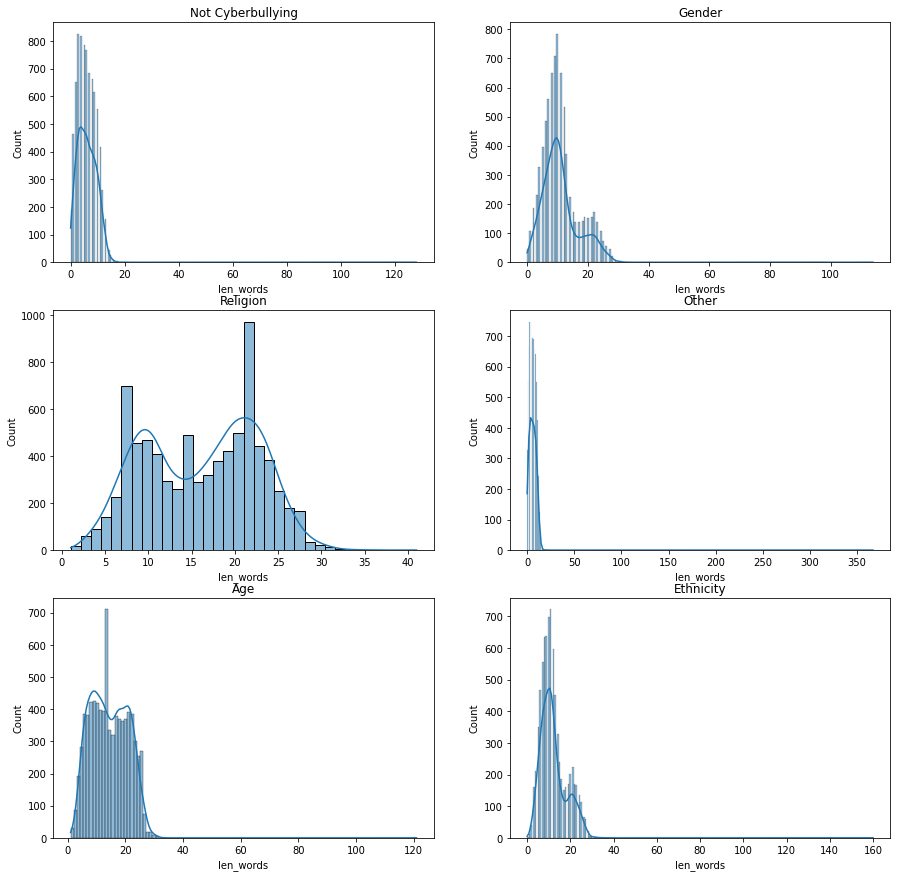

In [50]:
# Plot distribusi kalimat dari setiap kelas tweet
fig, ax =plt.subplots(3,2,figsize=(15,15))
ax[0,0].set_title('Not Cyberbullying')
sns.histplot(df_final[df_final['cyberbullying_type'] == 'not_cyberbullying']['len_words'], kde=True, ax=ax[0,0])
ax[0,1].set_title('Gender')
sns.histplot(df_final[df_final['cyberbullying_type'] == 'gender']['len_words'], kde=True, ax=ax[0,1])
ax[1,0].set_title('Religion')
sns.histplot(df_final[df_final['cyberbullying_type'] == 'religion']['len_words'], kde=True, ax=ax[1,0])
ax[1,1].set_title('Other')
sns.histplot(df_final[df_final['cyberbullying_type'] == 'other_cyberbullying']['len_words'], kde=True, ax=ax[1,1])
ax[2,0].set_title('Age')
sns.histplot(df_final[df_final['cyberbullying_type'] == 'age']['len_words'], kde=True, ax=ax[2,0])
ax[2,1].set_title('Ethnicity')
sns.histplot(df_final[df_final['cyberbullying_type'] == 'ethnicity']['len_words'], kde=True, ax=ax[2,1])

In [51]:
# Print Max dan Average Kata dari setiap kelas tweet
tweet_type = ['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity']
for i in tweet_type :
    print('Type ', i)
    print('Max kata pada setiap tweet sebelum Pre-Processing adalah ', df_eda[df_eda['cyberbullying_type'] == i]['len_words'].max())
    print('Max kata pada setiap tweet setelah Pre-Processing adalah ', df_final[df_final['cyberbullying_type'] == i]['len_words'].max())
    print('Persentase setelah Pre-Processing ',round((df_final[df_final['cyberbullying_type'] == i]['len_words'].max()/df_eda[df_eda['cyberbullying_type'] == i]['len_words'].max()*100),2))
    print('Mean kata pada setiap tweet sebelum Pre-Processing adalah ', round(df_eda[df_eda['cyberbullying_type'] == i]['len_words'].mean(),2))
    print('Mean kata pada setiap tweet setelah Pre-Processing adalah ', round(df_final[df_final['cyberbullying_type'] == i]['len_words'].mean(),2))
    print('Persentase setelah Pre-Processing ', round((df_final[df_final['cyberbullying_type'] == i]['len_words'].mean()/df_eda[df_eda['cyberbullying_type'] == i]['len_words'].mean()*100),2))
    print('-'*50)

Type  not_cyberbullying
Max kata pada setiap tweet sebelum Pre-Processing adalah  358
Max kata pada setiap tweet setelah Pre-Processing adalah  128
Persentase setelah Pre-Processing  35.75
Mean kata pada setiap tweet sebelum Pre-Processing adalah  17.66
Mean kata pada setiap tweet setelah Pre-Processing adalah  6.11
Persentase setelah Pre-Processing  34.57
--------------------------------------------------
Type  gender
Max kata pada setiap tweet sebelum Pre-Processing adalah  299
Max kata pada setiap tweet setelah Pre-Processing adalah  114
Persentase setelah Pre-Processing  38.13
Mean kata pada setiap tweet sebelum Pre-Processing adalah  29.3
Mean kata pada setiap tweet setelah Pre-Processing adalah  10.9
Persentase setelah Pre-Processing  37.22
--------------------------------------------------
Type  religion
Max kata pada setiap tweet sebelum Pre-Processing adalah  110
Max kata pada setiap tweet setelah Pre-Processing adalah  41
Persentase setelah Pre-Processing  37.27
Mean kata pad

Dari informasi diatas dapat disimpulkan bahwa :
- Rata-Rata kata pada `other_cyberbullying` cenderung lebih rendah dari pada kategori lain dengan kisaran 6 kata (dari awalnya 18 kata)
- Rata-Rata kata pada `religion` lebih tinggi dari pada kategori lain dengan kisaran 16 kata (dari awalnya 39 kata)
- Jumlah maksimal kata paling banyak adalah pada tipe tweet `other` dengan jumlah 367 kata (sudah berkurang dari awalnya 1.021)
- Pada setiap jenis tweet, jumlah kata **terdistribusi banyak (terpusat)** pada 10-20 kata (dari awalnya 20-40 kata)
- Secara *overall*, setelah pre-processing, penurunan max dan mean sekitar 60%-65%

## 6-2 Wordcloud Pada Setiap Tweet dan Kategori

Pada poin ini saya akan coba melihat *workcloud* pada semua tweet kemudian akan saya spesifikkan untuk setiap kategori

### 1. Wordcloud All Tweet

Saya akan coba visualisasikan *wordcloud* untuk *All Tweet*

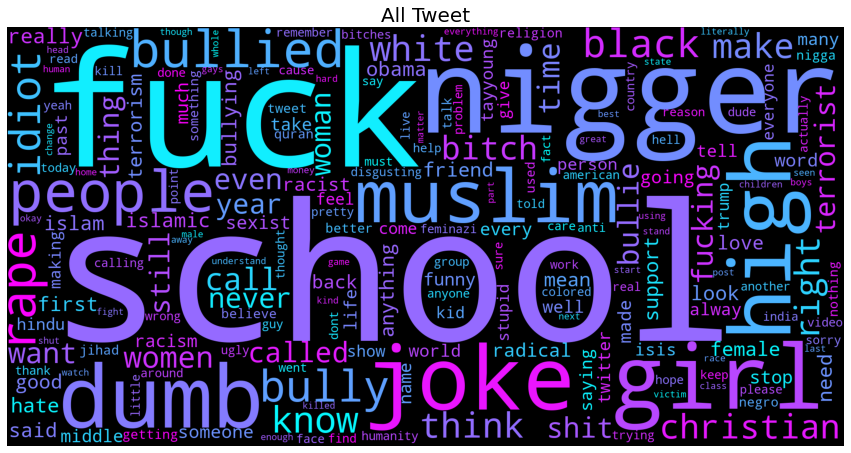

In [52]:
# Membuat wordcloud
text_all_final = df_final['tweet_processed'].values
cloud_all_final = WordCloud(background_color='black',colormap="cool",collocations=False,width=2000,height=1000).generate(" ".join(text_all_final))

# Menampilkan wordcloud
plt.figure(figsize=(15,10))
plt.axis('off')
plt.title("All Tweet",fontsize=20)
plt.imshow(cloud_all_final)

Dari informasi diatas dapat disimpulkan bahwa :
- Kata yang paling sering digunakan masih sama seperti sebelum pre-processing (*school*, *fuck*, *nigger*, *dumb*, *joke* dan muslim)
- *Stopwords* sudah berkurang dari pada sebelum pre-processing
- Sudah tidak terdapat website
- *Verb + ing/ed dan v2/v3* sudah berkurang tapi masih ada beberapa yang tersisa seperti *bullied, called* dll

### 2. Wordcloud Tweet Type `not_cyberbullying`

Saya akan coba visualisasikan *wordcloud* untuk *Not Cyberbullying*

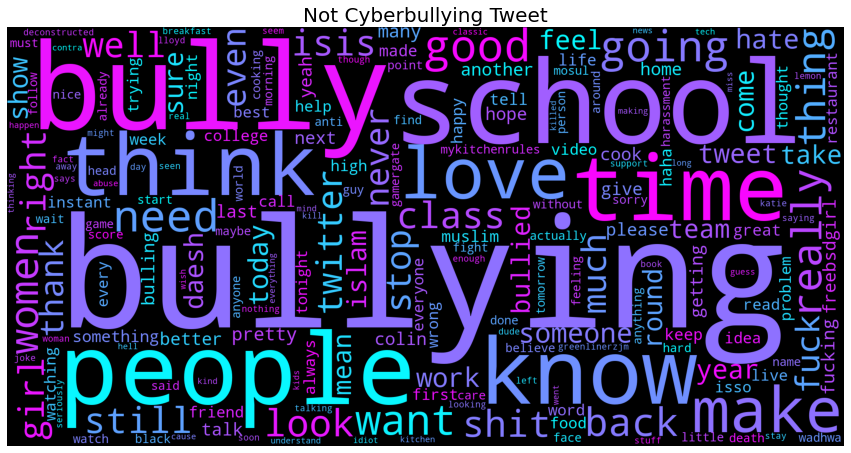

In [53]:
# Membuat wordcloud
text_not_cyberbullying_final = df_final[df_final['cyberbullying_type'] == 'not_cyberbullying'].tweet_processed.values
cloud_not_cyberbullying_final = WordCloud(background_color='black',colormap="cool",collocations=False,width=2000,height=1000).generate(" ".join(text_not_cyberbullying_final))

# Menampilkan wordcloud
plt.figure(figsize=(15,10))
plt.axis('off')
plt.title("Not Cyberbullying Tweet",fontsize=20)
plt.imshow(cloud_not_cyberbullying_final)

Dari informasi diatas dapat disimpulkan bahwa :
- Kata yang sering digunakan beberapa masih sama akan tetapi sudah tidak ada kata RT
- *Stopwords* sudah berkurang dari pada sebelum pre-processing
- Sudah tidak terdapat website
- *Verb + ing/ed dan v2/v3* sudah berkurang tapi masih ada beberapa yang tersisa seperti *trying, bullied* dll
- Berdasarkan wordcloud, untuk tipe tweet `not_cyberbullying` banyak fokus terhadap kata yang berhubungan dengan sekolah dan kehidupan sehari-hari seperti school, time, people, love, team, class dll

### 3. Wordcloud Tweet Type `gender`

Saya akan coba visualisasikan *wordcloud* untuk *Gender*

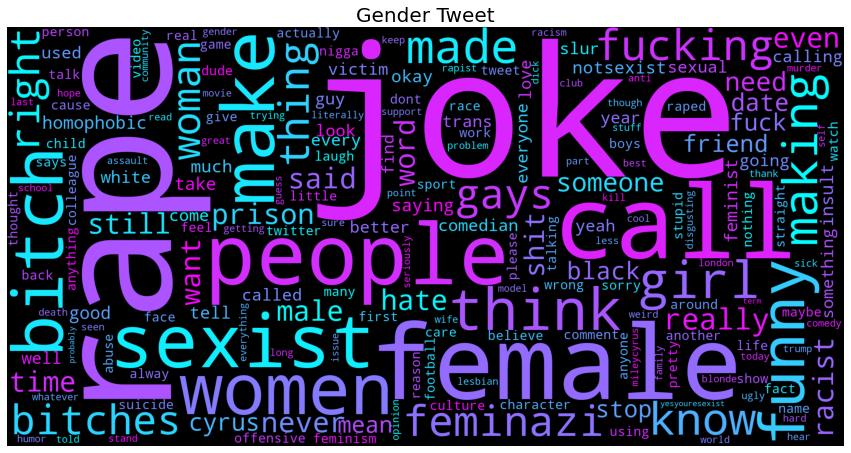

In [54]:
# Membuat wordcloud
text_gender_final = df_final[df_final['cyberbullying_type'] == 'gender'].tweet_processed.values
cloud_gender_final = WordCloud(background_color='black',colormap="cool",collocations=False,width=2000,height=1000).generate(" ".join(text_gender_final))

# Menampilkan wordcloud
plt.figure(figsize=(15,10))
plt.axis('off')
plt.title("Gender Tweet",fontsize=20)
plt.imshow(cloud_gender_final)

Dari informasi diatas dapat disimpulkan bahwa :
- Kata yang sering digunakan beberapa masih sama akan tetapi sudah tidak ada kata RT
- *Stopwords* sudah berkurang dari pada sebelum pre-processing
- Sudah tidak terdapat website
- *Verb + ing/ed dan v2/v3* sudah berkurang tapi masih ada beberapa yang tersisa seperti *called, talking* dll
- Berdasarkan wordcloud, untuk tipe tweet `gender` banyak fokus terhadap kata yang berhubungan dengan wanita seperti female, women, feminist, sexist dll. Dengan kata lain tweet gender ini sepertinya banyak ditujukan untuk kaum perempuan

### 4. Wordcloud Tweet Type `religion`

Saya akan coba visualisasikan *wordcloud* untuk *Religion*

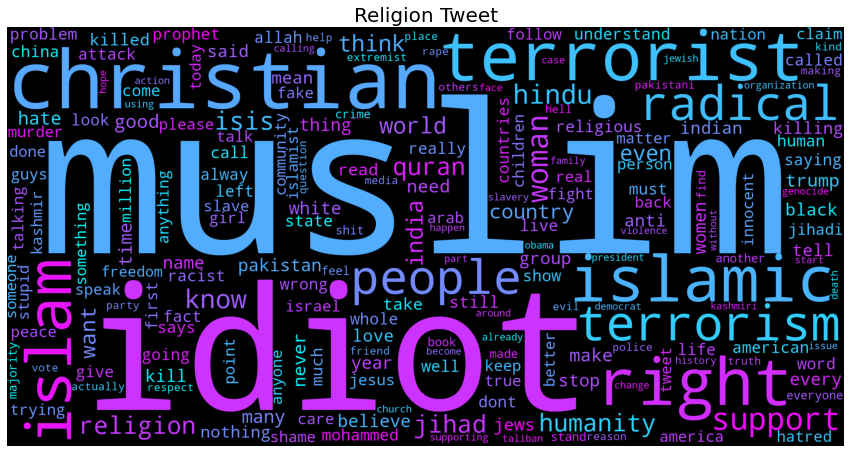

In [55]:
# Membuat wordcloud
text_religion_final = df_final[df_final['cyberbullying_type'] == 'religion'].tweet_processed.values
cloud_religion_final = WordCloud(background_color='black',colormap="cool",collocations=False,width=2000,height=1000).generate(" ".join(text_religion_final))

# Menampilkan wordcloud
plt.figure(figsize=(15,10))
plt.axis('off')
plt.title("Religion Tweet",fontsize=20)
plt.imshow(cloud_religion_final)

Dari informasi diatas dapat disimpulkan bahwa :
- Kata yang sering digunakan beberapa masih sama seperti sebelum pre-processing
- *Stopwords* sudah berkurang dari pada sebelum pre-processing
- Sudah tidak terdapat website
- *Verb + ing/ed dan v2/v3* sudah berkurang tapi masih ada beberapa yang tersisa seperti *killing, talking, called* dll
- Berdasarkan wordcloud, untuk tipe tweet `religion` banyak fokus terhadap kata yang berhubungan dengan agama islam dan kristen seperti muslim, christian, islamic, pakistan dll

### 5. Wordcloud Tweet Type `other_cyberbullying`

Saya akan coba visualisasikan *wordcloud* untuk *Other Cyberbullying*

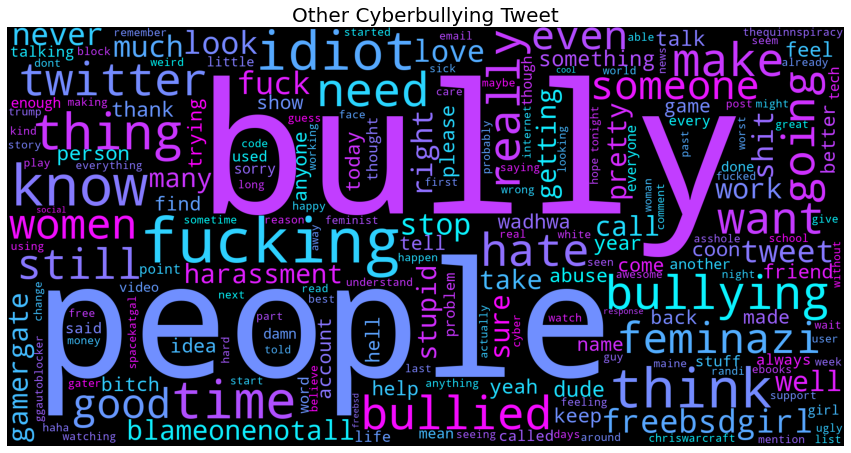

In [56]:
# Membuat wordcloud
text_other_cyberbullying_final = df_final[df_final['cyberbullying_type'] == 'other_cyberbullying'].tweet_processed.values
cloud_other_cyberbullying_final = WordCloud(background_color='black',colormap="cool",collocations=False,width=2000,height=1000).generate(" ".join(text_other_cyberbullying_final))

# Menampilkan wordcloud
plt.figure(figsize=(15,10))
plt.axis('off')
plt.title("Other Cyberbullying Tweet",fontsize=20)
plt.imshow(cloud_other_cyberbullying_final)

Dari informasi diatas dapat disimpulkan bahwa :
- Kata yang sering digunakan berubah menjadi bully, people dan fucking
- *Stopwords* sudah berkurang dari pada sebelum pre-processing
- Sudah tidak terdapat website
- *Verb + ing/ed dan v2/v3* sudah berkurang tapi masih ada beberapa yang tersisa seperti *waying, watching, feeling, looking* dll
- Berdasarkan wordcloud, untuk tipe tweet `other_cyberbullying` kata-kata nya terlalu random akan tetapi di-dominasi oleh kata yang mengandung hinaan seperti idiot dll

### 6. Wordcloud Tweet Type `age`

Saya akan coba visualisasikan *wordcloud* untuk *age*

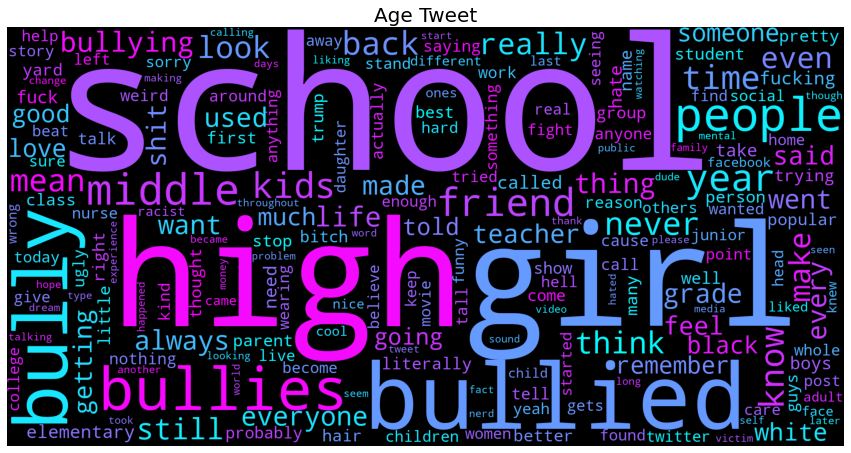

In [57]:
# Membuat wordcloud
text_age_final = df_final[df_final['cyberbullying_type'] == 'age'].tweet_processed.values
cloud_age_final = WordCloud(background_color='black',colormap="cool",collocations=False,width=2000,height=1000).generate(" ".join(text_age_final))

# Menampilkan wordcloud
plt.figure(figsize=(15,10))
plt.axis('off')
plt.title("Age Tweet",fontsize=20)
plt.imshow(cloud_age_final)

Dari informasi diatas dapat disimpulkan bahwa :
- Setelah pre-processing kata yang sering digunakan masih sama yaitu school, girl, high, bullied, bullies dan bully
- Sudah tidak terdapat *stopwords*
- Sudah tidak terdapat website
- Terdapat *verb + ing/ed dan v2/v3* seperti talking, bullying, getting, dan called
- Berdasarkan wordcloud, untuk tipe tweet `age` banyak fokus terhadap kata yang berhubungan dengan sekolah seperti teacher, kids, high school, middle school dll

### 7. Wordcloud Tweet Type `ethnicity`

Saya akan coba visualisasikan *wordcloud* untuk *ethnicity*

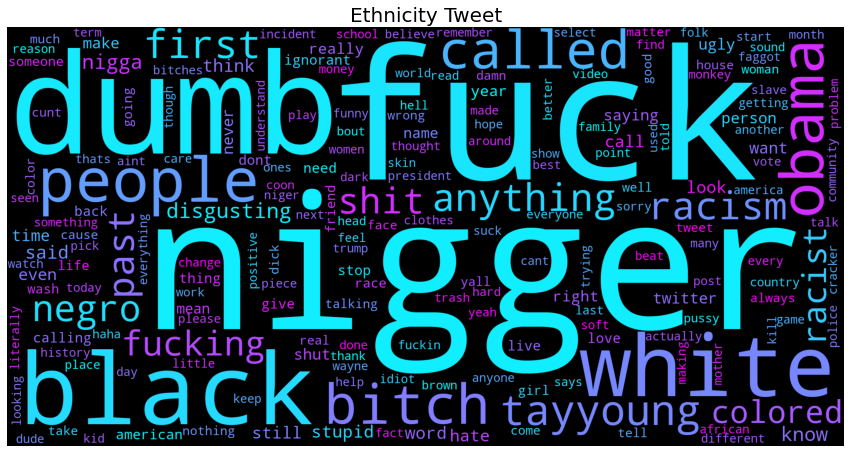

In [58]:
# Membuat wordcloud
text_ethnicity_final = df_final[df_final['cyberbullying_type'] == 'ethnicity'].tweet_processed.values
cloud_ethnicity_final = WordCloud(background_color='black',colormap="cool",collocations=False,width=2000,height=1000).generate(" ".join(text_ethnicity_final))

# Menampilkan wordcloud
plt.figure(figsize=(15,10))
plt.axis('off')
plt.title("Ethnicity Tweet",fontsize=20)
plt.imshow(cloud_ethnicity_final)

Dari informasi diatas dapat disimpulkan bahwa :
- Kata yang sering digunakan pada *ethnicity* beberapa masih sama akan tetapi ada tambahan obama, tayyoung dan *called*
- Sudah tidak terdapat *stopwords*
- Sudah tidak terdapat website
- Terdapat *verb + ing* seperti *saying* dan *talking*
- Berdasarkan wordcloud, untuk tipe tweet `ethnicity` banyak fokus terhadap istilah lain dari suatu suku dan warna kulit seperti black, white, nigger dll

# 7 - Model Definition

Notes :  
1. Algoritma yang dipakai adalah LSTM dan GRU. Nantinya model ini akan di-improve masing masing kemudian akan dipilih 1 model yang paling optimal. Sehingga total model pada penelitian ini ada 4
   
   Alasan : 
   - GRU memiliki waktu *training* yang cepat sehingga cocok digunakan untuk pembanding LSTM
   - LSTM digunakan karena LSTM cocok untuk *dataset* dengan jumlah yang besar. Jumlah *dataset* adalah 47.000 selain itu LSTM cocok digunakan untuk data yang memiliki bentuk teks


   
2. Metrics yang akan dipakai adalah `Accuracy` dan `ROC-AUC`

   Alasan : 
   - `Accuracy` digunakan karena saya membutuhkan prediksi yang tepat di 6 kelas tipe *bullying*. Karena jika ada 1 saja yang salah klasifikasi ke tipe non-bullying maka dapat menyebabkan *tweet* tidak di-tindak lanjut. Hal ini dapat menyebabkan tingginya tingkat *cyber bullying*. Oleh karena itu `Accuracy` dipilih. Selain itu *dataset* ini *balance* sehingga *metrics* `Accuracy` cocok digunakan
   - `ROC-AUC` digunakan karena saya perlu *metrics* yang dapat meng-evaluasi apakah model terpengaruh *treshold* atau tidak

3. Acceptable score saya setting di angka **0.7 (70%)**

  Alasan : 
  Berdasarkan *research* saya, model dikatakan baik apabila memiliki *score* diatas 0.7 (https://www.obviously.ai/post/machine-learning-model-performance#:~:text=Good%20accuracy%20in%20machine%20learning,not%20only%20ideal%2C%20it's%20realistic)

# 8 - Model LSTM Baseline (Training, Evaluation & Analysis)

Bagian ini dibagi menjadi 3 yaitu *Training Model*, *Evaluatin Model* dan *Analysis Model*. Evaluasi Model lebih ke arah *metrics* sedangkan Analisis Model lebih ke arah bisnis dan kecenderungan prediksi model

## 8-1 Model Training

Untuk Model Baseline saya akan mencoba *trial and error* menggunakan *rules* sebagai berikut (https://towardsdatascience.com/17-rules-of-thumb-for-building-a-neural-network-93356f9930af) :

- Menggunakan Sequential API. Karena untuk model Baseline saya usahakan se-simple mungkin agar nanti dapat mengetahui apa yang perlu ditingkatkan dari model tersebut
- *Hidden* layer inisialisasi adalah 5 layer karena jumlah data 47.000
- *Neuron* menggunakan *geometric progression* menurun 128,64,32 dll
- *Optimizer* inisialisasi menggunakan Adam karena optimizer memiliki waktu konvergen yang cepat
-  Menggunakan LSTM karena memiliki jumlah data yang besar (47.000)

In [59]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [60]:
# Text Vectorization Layer

text_vectorization = TextVectorization(max_tokens=jml_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,)
                                       )

text_vectorization.adapt(X_train)

Untuk layer `text_vectorization` saya menggunakan `ngrams` *None* karena untuk inisialisasi lebih baik 0 agar mengetahui sekiranya perlu menambah kata (*augmentation*) dengan `ngrams` atau tidak. Selanjutnya adalah membuat *layer embedding*

In [61]:
# Embedding Layer

embedding_baseline = Embedding(input_dim=jml_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len
                      )

Untuk *layer embedding* saya menggunakan `output_dim` 128 karena memiliki jumlah vocab (40.188) dan input length yang besar (363). Kemudian saya akan menyusun model inisialisasi. Kemudian saya akan coba cek urutan token dengan frekuensi terbesar

In [62]:
# Melihat Top 20 Token (Diurutkan Berdasarkan Frekuensi Kemunculan Terbesar)

text_vectorization.get_vocabulary()[:20]

['',
 '[UNK]',
 'school',
 'fuck',
 'dumb',
 'high',
 'people',
 'bullied',
 'nigger',
 'rape',
 'bully',
 'jokes',
 'girls',
 'girl',
 'black',
 'muslims',
 'muslim',
 'know',
 'white',
 'bitch']

Berdasarkan informasi diatas kata *school*, *fuck* dan *dumb* adalah 3 kata yang paling sering muncul. Kemudian adalah penyusunan model

In [63]:
# Penyusunan Model
model_baseline = Sequential()

# Layer Text Vectorization
model_baseline.add(text_vectorization)

# Layer Embedding
model_baseline.add(embedding_baseline)

# Hidden Layer 1
model_baseline.add(LSTM(128, return_sequences=True))

# Hidden Layer 2
model_baseline.add(LSTM(64, return_sequences=True))

# Hidden Layer 3
model_baseline.add(LSTM(32, return_sequences=True))

# Hidden Layer 4
model_baseline.add(LSTM(16, return_sequences=True))

# Hidden Layer 5
model_baseline.add(LSTM(8))

# Layer Output
model_baseline.add(Dense(6,activation='softmax'))

# Compile
model_baseline.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy','AUC'])

# Summary
model_baseline.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 310)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 310, 128)          4851968   
                                                                 
 lstm (LSTM)                 (None, 310, 128)          131584    
                                                                 
 lstm_1 (LSTM)               (None, 310, 64)           49408     
                                                                 
 lstm_2 (LSTM)               (None, 310, 32)           12416     
                                                                 
 lstm_3 (LSTM)               (None, 310, 16)           3136      
                                                        

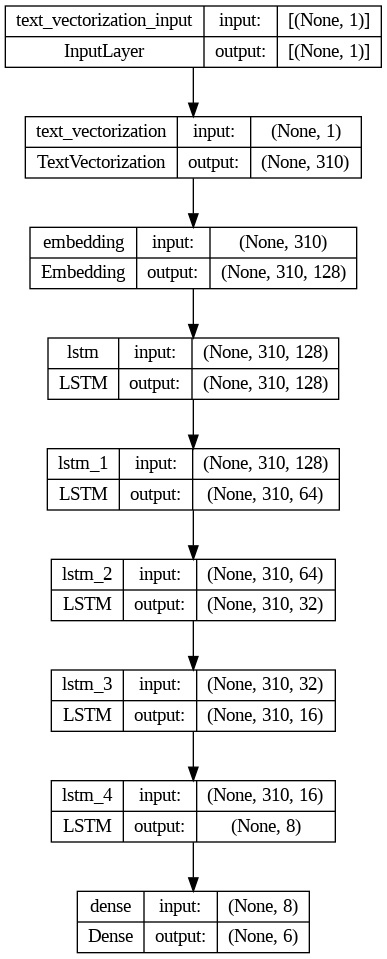

In [64]:
# Plot Layers
tf.keras.utils.plot_model(model_baseline, show_shapes=True)

Model LSTM Baseline mempunyai 9 layer yang terdiri dari *input layer*, *text vectorization layer*, *embedding layer*, 5 LSTM *hidden layer* dan 1 *output layer*. Untuk penjelasan tiap layer adalah sebagai berikut :

1. *Input Layer*

  Layer ini menerima *input* dengan dimensi (0,1)

2. *Text Vectorization Layer*

  *Layer* ini menerima *input* dari *input layer* kemudian mengubahnya menjadi bentuk vektor dengan dimensi (0,310)

3. *Embedding Layer*

  Kemudian vektor tersebut akan dilakukan embedding dengan 4.851.968 parameter dan menghasilkan *output* dengan dimensi (0,310,128)

4. *Hidden Layer LSTM 1*

  Kemudian *output* dari *embedding layer* akan di-*training* di *hidden layer LSTM 1* dengan 131.584 parameter dan menghasilkan *output* dengan dimensi (0,310,128)

5. *Hidden Layer LSTM 2*

  Kemudian *output* dari *hidden layer LSTM 1* akan di-*training* di *hidden layer LSTM 2* dengan 49.408 parameter dan menghasilkan *output* dengan dimensi (0,310,64)

6. *Hidden Layer LSTM 3*

  Kemudian *output* dari *hidden layer LSTM 2* akan di-*training* di *hidden layer LSTM 3* dengan 12.416 parameter dan menghasilkan *output* dengan dimensi (0,310,32)

7. *Hidden Layer LSTM 4*

  Kemudian *output* dari *hidden layer LSTM 3* akan di-*training* di *hidden layer LSTM 4* dengan 3136 parameter dan menghasilkan *output* dengan dimensi (0,310,16)

8. *Hidden Layer LSTM 5*

  Kemudian *output* dari *hidden layer LSTM 4* akan di-*training* di *hidden layer LSTM 5* dengan 800 parameter dan menghasilkan *output* dengan dimensi (0,8)

9. *Output Layer*

  Kemudian *output* dari *hidden layer LSTM 5* akan di-*training* di *output layer* dengan 54 parameter untuk menghasilkan *output* dengan dimensi (0,6)



Selanjutnya adalah *training* model *baseline LSTM*

In [65]:
# Train the Model
model_baseline_hist = model_baseline.fit(train_pipe, epochs=30, validation_data=val_pipe)

Epoch 1/30
1076/1076 [==============================] - 93s 74ms/step - loss: 1.7922 - accuracy: 0.1667 - auc: 0.5014 - val_loss: 1.7928 - val_accuracy: 0.1595 - val_auc: 0.4965
Epoch 2/30
1076/1076 [==============================] - 57s 53ms/step - loss: 1.7921 - accuracy: 0.1652 - auc: 0.5002 - val_loss: 1.7924 - val_accuracy: 0.1595 - val_auc: 0.4987
Epoch 3/30
1076/1076 [==============================] - 56s 52ms/step - loss: 1.7920 - accuracy: 0.1662 - auc: 0.5006 - val_loss: 1.7918 - val_accuracy: 0.1769 - val_auc: 0.5036
Epoch 4/30
1076/1076 [==============================] - 55s 51ms/step - loss: 1.7919 - accuracy: 0.1660 - auc: 0.5007 - val_loss: 1.7922 - val_accuracy: 0.1595 - val_auc: 0.4967
Epoch 5/30
1076/1076 [==============================] - 56s 52ms/step - loss: 1.7919 - accuracy: 0.1655 - auc: 0.5007 - val_loss: 1.7920 - val_accuracy: 0.1595 - val_auc: 0.4994
Epoch 6/30
1076/1076 [==============================] - 54s 50ms/step - loss: 1.7919 - accuracy: 0.1670 - auc:

## 8-2 Model Evaluation (Evaluasi Berdasarkan Metrics)

Saya akan coba membuat dataframe agar memudahkan *tracking score* pada setiap *epoch* 

In [66]:
# Create DataFrame

history_baseline_df = pd.DataFrame(model_baseline_hist.history)
history_baseline_df.tail(5)

loss  accuracy       auc  val_loss  val_accuracy   val_auc
25  1.791858  0.164275  0.500445  1.792070      0.159454  0.496594
26  1.791865  0.167935  0.500414  1.792082      0.159454  0.496594
27  1.791874  0.164769  0.501229  1.791930      0.159454  0.499375
28  1.791826  0.168429  0.500448  1.792057      0.159454  0.496660
29  1.791836  0.167645  0.499911  1.792078      0.159454  0.496594

Setelah membuat dataframe selanjutnya adalah pembuatan visualisasi untuk memudahkan pemahaman

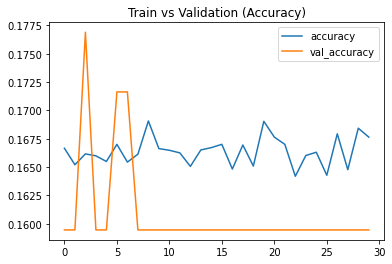

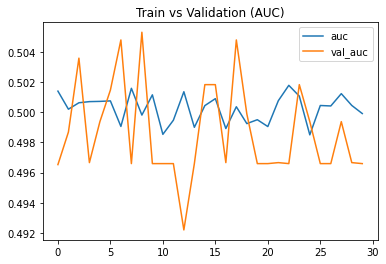

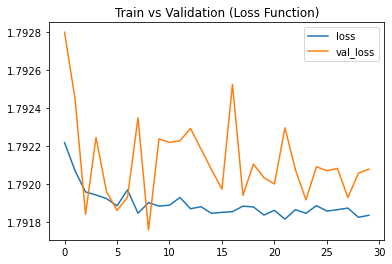

In [105]:
# Plot Traning Results

history_baseline_df[['accuracy', 'val_accuracy']].plot(title='Train vs Validation (Accuracy)')
history_baseline_df[['auc', 'val_auc']].plot(title='Train vs Validation (AUC)')
history_baseline_df[['loss', 'val_loss']].plot(title='Train vs Validation (Loss Function)')


Dari visualisasi diatas dapat disimpulkan bahwa :    
- Accuracy, AUC, dan Loss pada *train-set* dan *validation-set* cenderung naik dan turun secara tidak stabil. Oleh karena itu model ini termasuk ke-dalam *problem gradient explode*
- Accuracy pada *train-set* berpusat pada 16% yang artinya model hanya mampu memprediksi 16% dari data *train-set*. Selain itu nilai ini menunjukkan bahwa model tidak dapat belajar dari data *train*
- Accuracy pada *validation-set* juga berpusat pada 16% yang artinya model tidak dapat memprediksi dengan benar
- AUC pada *train-set* dan *validation-set* memiliki nilai yang buruk yaitu berpusat pada 0.4-0.5 dan tidak stabil pada setiap epoch-nya. Artinya model sangat dipengaruhi oleh treshold
- Loss pada *train-set* dan *validation-set* memiliki nilai yang tinggi dan tidak stabil (berpusat di antara 1.79). Artinya model ini masih belum menemukan titik konvergen nya (karena kalau konvergen seharusnya stabil)

Kemudian saya akan coba lakukan evaluasi pada *test-set*

In [111]:
# Model Evaluation of test-set

y_pred_baseline = np.argmax(model_baseline.predict(X_test), axis=-1)
print(classification_report(y_test, y_pred_baseline))

224/224 [==============================] - 5s 24ms/step
              precision    recall  f1-score   support

           0       0.17      1.00      0.29      1196
           1       0.00      0.00      0.00      1153
           2       0.00      0.00      0.00      1200
           3       0.00      0.00      0.00      1209
           4       0.00      0.00      0.00      1190
           5       0.00      0.00      0.00      1201

    accuracy                           0.17      7149
   macro avg       0.03      0.17      0.05      7149
weighted avg       0.03      0.17      0.05      7149



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [114]:
# Perhitungan AUC
prob_baseline = model_baseline.predict(X_test)
auc_baseline = roc_auc_score(y_test, prob_baseline, multi_class='ovr')
auc_baseline



224/224 [==============================] - 6s 25ms/step


0.5

Dari informasi diatas dapat disimpulkan bahwa :
- Model memprediksi semua data ke kelas 0 (Jenis `Age`)
- Berdasarkan nilai *AUC* (0.5), dapat disimpulkan bahwa model dipengaruhi oleh *treshold*
- Nilai `Accuracy` *train-set* (epoch terakhir) dan *test-set* memiliki nilai yang sangat rendah, untuk *train-set* di angka 16% sedangkan untuk *test-set* di angka 17%. Yang artinya **model tersebut underfit**
- Model memiliki akurasi 17% yang artinya model tidak dapat mengklasifikasikan kelas tweet dengan baik  (karena diatas *acceptable score* pada poin model definition)

## 8-3 Model Analysis (Evaluasi Berdasarkan Bisnis/Kecenderungan prediksi model)

Sebelum analisis lebih lanjut saya akan membuat *dataframe* untuk membandingkan hasil prediksi dan aktual

In [116]:
# Pembuatan DF Act vs Pred
act_pred_baseline = pd.DataFrame({
            'actual' : y_test,
            'prediction' : np.ndarray.flatten(y_pred_baseline)
})
df_act_pred_baseline = pd.concat([pd.DataFrame(X_test), act_pred_baseline],axis=1)
df_act_pred_baseline 

tweet_processed  actual  prediction
18963  want world calling half muslims idiots encoura...       5           0
39710  truth truth subjective science unlike vulgar a...       0           0
40710  stand niggers expect black fail everything fuc...       1           0
40441                       look since niggers damn dumb       1           0
1120                          oohnicoleee smiling retard       3           0
...                                                  ...     ...         ...
44386  blessings heaped upon american negro nights wo...       1           0
26404                               tell stop pair bully       4           0
26379                                                          4           0
21071  right anything muslims idiots never enough mug...       5           0
5369        great comeback manu cook good food next time       3           0

[7149 rows x 3 columns]

Saya akan coba *plot confusion matrix* untuk mengecek kecenderungan prediksi model 

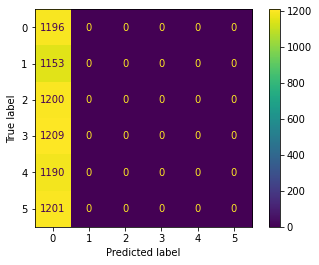

In [117]:
# Confusion Matrix
cm_test_baseline = confusion_matrix(y_test, y_pred_baseline)
ConfusionMatrixDisplay(cm_test_baseline).plot()

Dari informasi diatas dapat disimpulkan bahwa :
1. Model memprediksi semua data menjadi kelas 0 (*age*)

# 9 - Model Improvement LSTM (Training, Evaluation & Analysis)

Bagian ini dibagi menjadi 3 yaitu *Training Model*, *Evaluatin Model* dan *Analysis Model*. Evaluasi Model lebih ke arah *metrics* sedangkan Analisis Model lebih ke arah bisnis dan kecenderungan prediksi model

## 9-1 Model Training

Berdasarkan Evaluasi Model Baseline LSTM maka saya melakukan *improve* sebagai berikut:

- Jumlah Neuron dan Layer tidak dapat dikurangi karena jika dilihat dari hasil *train*, *validation* dan *test* dapat dilihat bahwa **Model Baseline LSTM memiliki *score* yang sangat rendah. Artinya, model tersebut kurang belajar**

- **Menambahkan layer Bidirectional Layer agar model dapat belajar dua arah, dari backward dan forward**
- *Neuron* menggunakan *geometric progression* menurun 128,64,32 dll
- *Optimizer* inisialisasi tetap menggunakan Adam karena optimizer memiliki waktu konvergen yang cepat (saya sudah mencoba training dengan beberapa optimizer lainnnya akan tetapi hasilnya tidak jauh berbeda)


**Note *training* yang telah dicoba :** 
1. Saya sudah coba melakukan *training* dengan menambah neuron (menggunakan geometric progression) dan layer (10 layer) akan tetapi performa tidak berubah banyak oleh karena itu saya menggunakan neuron dan layer sama dengan baseline
2. Saya sudah mencoba training dengan beberapa optimizer lainnnya akan tetapi hasilnya tidak jauh berbeda 
3. Saya sudah mencoba *training* dengan dropout dan normalization akan tetapi performa model menjadi semakin buruk. Oleh karena itu untuk *improvement* saya cukup menambahkan *Bidirectional Layer*

In [136]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [137]:
# Penyusunan Model
model_imp1 = Sequential()

# Layer Text Vectorization
model_imp1.add(text_vectorization)

# Layer Embedding
model_imp1.add(embedding_baseline)


# Hidden Layer 1
model_imp1.add(tf.keras.layers.Bidirectional(LSTM(128,return_sequences=True)))


# Hidden Layer 2
model_imp1.add(tf.keras.layers.Bidirectional(LSTM(64, return_sequences=True)))



# Hidden Layer 3
model_imp1.add(tf.keras.layers.Bidirectional(LSTM(32,return_sequences=True)))


# Hidden Layer 4
model_imp1.add(tf.keras.layers.Bidirectional(LSTM(16, return_sequences=True)))



# Hidden Layer 5
model_imp1.add(tf.keras.layers.Bidirectional(LSTM(8)))



# Layer Output
model_imp1.add(Dense(6,activation='softmax'))

# Compile
model_imp1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy','AUC'])

# Summary
model_imp1.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 310)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 310, 128)          4851968   
                                                                 
 bidirectional (Bidirectiona  (None, 310, 256)         263168    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 310, 128)         164352    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 310, 64)          41216     
 nal)                                                   

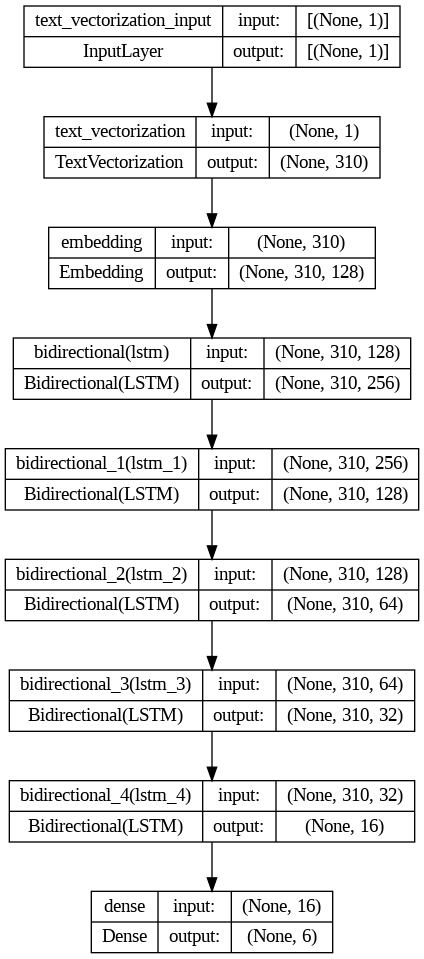

In [138]:
# Plot Layers
tf.keras.utils.plot_model(model_imp1,show_shapes=True)

Model Improvement LSTM mempunyai 9 layer yang terdiri dari *input layer*, *text vectorization layer*, *embedding layer*, 5 Bidirectional LSTM *hidden layer* dan 1 *output layer*. Untuk penjelasan tiap layer adalah sebagai berikut :

1. *Input Layer*

  Layer ini menerima *input* dengan dimensi (0,1)

2. *Text Vectorization Layer*

  *Layer* ini menerima *input* dari *input layer* kemudian mengubahnya menjadi bentuk vektor dengan dimensi (0,310)

3. *Embedding Layer*

  Kemudian vektor tersebut akan dilakukan embedding dengan 4.851.968 parameter dan menghasilkan *output* dengan dimensi (0,310,128)

4. *Hidden Layer Bidirectional LSTM 1*

  Kemudian *output* dari *embedding layer* akan di-*training* di *hidden layer bidirectional LSTM 1* dengan 263.168 parameter dan menghasilkan *output* dengan dimensi (0,310,256)

5. *Hidden Layer Bidirectional LSTM 2*

  Kemudian *output* dari *hidden layer bidirectional LSTM 1* akan di-*training* di *hidden layer bidirectional LSTM 2* dengan 164.352 parameter dan menghasilkan *output* dengan dimensi (0,310,128)

6. *Hidden Layer Bidirectional LSTM 3*

  Kemudian *output* dari *hidden layer bidirectional LSTM 2* akan di-*training* di *hidden layer bidirectional LSTM 3* dengan 41.216 parameter dan menghasilkan *output* dengan dimensi (0,310,64)

7. *Hidden Layer Bidirectional LSTM 4*

  Kemudian *output* dari *hidden layer bidirectional LSTM 3* akan di-*training* di *hidden layer bidirectional LSTM 4* dengan 10.368 parameter dan menghasilkan *output* dengan dimensi (0,310,32)

8. *Hidden Layer Bidirectional LSTM 5*

  Kemudian *output* dari *hidden layer bidirectional LSTM 4* akan di-*training* di *hidden layer bidirectional LSTM 5* dengan 2.624 parameter dan menghasilkan *output* dengan dimensi (0,16)

9. *Output Layer*

  Kemudian *output* dari *hidden layer bidirectional LSTM 5* akan di-*training* di *output layer* dengan 102 parameter untuk menghasilkan *output* dengan dimensi (0,6)



Selanjutnya adalah *training* model *improvement LSTM*

In [140]:
# Train the Model
model_imp1_hist = model_imp1.fit(train_pipe, epochs=30, validation_data=val_pipe)

Epoch 1/30
1076/1076 [==============================] - 156s 118ms/step - loss: 0.3378 - accuracy: 0.9211 - auc: 0.9902 - val_loss: 0.7421 - val_accuracy: 0.7731 - val_auc: 0.9523
Epoch 2/30
1076/1076 [==============================] - 109s 101ms/step - loss: 0.1294 - accuracy: 0.9493 - auc: 0.9974 - val_loss: 0.8959 - val_accuracy: 0.7905 - val_auc: 0.9454
Epoch 3/30
1076/1076 [==============================] - 116s 108ms/step - loss: 0.1063 - accuracy: 0.9543 - auc: 0.9982 - val_loss: 0.9995 - val_accuracy: 0.7667 - val_auc: 0.9239
Epoch 4/30
1076/1076 [==============================] - 107s 100ms/step - loss: 0.0896 - accuracy: 0.9566 - auc: 0.9986 - val_loss: 1.0725 - val_accuracy: 0.7700 - val_auc: 0.9187
Epoch 5/30
1076/1076 [==============================] - 111s 103ms/step - loss: 0.0849 - accuracy: 0.9585 - auc: 0.9986 - val_loss: 1.1067 - val_accuracy: 0.7777 - val_auc: 0.9154
Epoch 6/30
1076/1076 [==============================] - 107s 100ms/step - loss: 0.0813 - accuracy: 0

## 9-2 Model Evaluation (Evaluasi Berdasarkan Metrics)

Saya akan coba membuat dataframe agar memudahkan *tracking score* pada setiap *epoch* 

In [141]:
# Create DataFrame

history_imp1_df = pd.DataFrame(model_imp1_hist.history)
history_imp1_df.tail(5)

loss  accuracy       auc  val_loss  val_accuracy   val_auc
25  0.061341  0.967093  0.999391  1.430238      0.771269  0.903066
26  0.056643  0.970026  0.999467  1.367909      0.776205  0.908269
27  0.058693  0.966889  0.999400  1.415249      0.776205  0.904410
28  0.059291  0.968429  0.999342  1.449813      0.780319  0.903624
29  0.057300  0.968225  0.999411  1.341398      0.778345  0.909857

Setelah membuat dataframe selanjutnya adalah pembuatan visualisasi untuk memudahkan pemahaman

(0.0, 3.0)

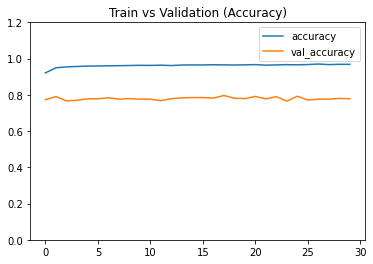

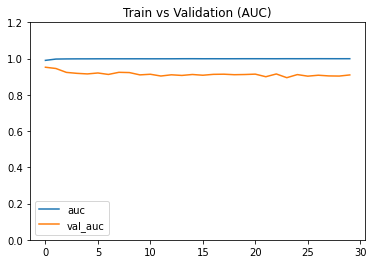

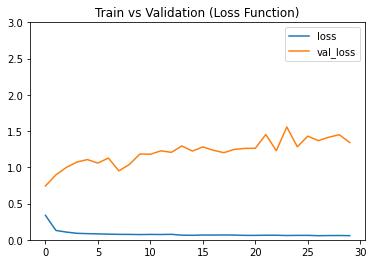

In [144]:
# Plot Traning Results

history_imp1_df[['accuracy', 'val_accuracy']].plot(title='Train vs Validation (Accuracy)')
plt.ylim(0,1.2)
history_imp1_df[['auc', 'val_auc']].plot(title='Train vs Validation (AUC)')
plt.ylim(0,1.2)
history_imp1_df[['loss', 'val_loss']].plot(title='Train vs Validation (Loss Function)')
plt.ylim(0,3)


Dari visualisasi diatas dapat disimpulkan bahwa :    
- Accuracy *train-set* dan Accuracy *validation-set* memiliki selisih yang cukup jauh antara 10%-15% akan tetapi model ini memiliki performa yang lebih baik dari pada baseline. Accuracy *train-set* berpusat pada 95% sedangkan untuk *validation-set* berpusat pada 80%. Sedangkan untuk Accuracy baseline terpusat pada 17% pada *train-set* dan *validation-set*. **Sehingga model ini dapat meningkatkan Accuracy sebesar 67% dari pada baseline**. Akan tetapi model ini masih masuk ke dalam **problem overfit**. **Note : saya sudah mencoba melakukan regularisasi, dropout dan normalisasi akan tetapi performa menjadi lebih jelek, oleh karena itu saya tidak melakukan teknik tersebut**
- Kemudian dari nilai Accuracy bisa dilihat bahwa model ini dapat mengklasifikasikan kelas tweet dengan baik (akurasi sekitar 75%-80%, diatas *acceptable score* pada poin *model definition*)
- AUC pada *train-set* dan *validation-set* memiliki nilai yang tinggi yaitu berpusat pada 0.95-1. Artinya model tidak dipengaruhi oleh treshold
- Loss pada *train-set* cenderung stabil dibawah 0.5 sedangkan loss pada *validation-set* cenderung tidak stabil dan menyebar di antara 1 - 1.5. Artinya model ini masih belum menemukan titik konvergen nya (karena kalau konvergen seharusnya stabil)

Kemudian saya akan coba lakukan evaluasi pada *test-set*

In [145]:
# Model Evaluation of test-set

y_pred_imp1 = np.argmax(model_imp1.predict(X_test), axis=-1)

print(classification_report(y_test, y_pred_imp1))

224/224 [==============================] - 12s 42ms/step
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1196
           1       0.95      0.96      0.96      1153
           2       0.85      0.81      0.83      1200
           3       0.47      0.39      0.43      1209
           4       0.48      0.57      0.52      1190
           5       0.93      0.93      0.93      1201

    accuracy                           0.77      7149
   macro avg       0.77      0.77      0.77      7149
weighted avg       0.77      0.77      0.77      7149



In [146]:
# Perhitungan AUC
prob_imp1 = model_imp1.predict(X_test)
auc_imp1 = roc_auc_score(y_test, prob_imp1, multi_class='ovr')
auc_imp1

224/224 [==============================] - 9s 38ms/step


0.9346345242840001

Dari informasi diatas dapat disimpulkan bahwa :
- Model memprediksi dapat memprediksi dengan baik untuk beberapa kelas kecuali kelas 3 dan kelas 4 (not cyberbullying dan other cyberbullying)
- Berdasarkan nilai *AUC* (0.93), dapat disimpulkan bahwa model tidak dipengaruhi oleh *treshold*
- Nilai `Accuracy` *train-set* (epoch terakhir) dan *test-set* memiliki selisih yang tinggi, untuk *train-set* di angka 96% sedangkan untuk *test-set* di angka 77%. Yang artinya **model tersebut overfit**
- Model memiliki akurasi 77% yang artinya model dapat mengklasifikasikan kelas tweet dengan baik (karena diatas *acceptable score* pada poin model definition)

## 9-3 Model Analysis (Evaluasi Berdasarkan Bisnis/Kecenderungan prediksi model)


Sebelum analisis lebih lanjut saya akan membuat *dataframe* untuk membandingkan hasil prediksi dan aktual

In [147]:
# Pembuatan DF Act vs Pred
act_pred_imp1 = pd.DataFrame({
            'actual' : y_test,
            'prediction' : np.ndarray.flatten(y_pred_imp1)
})
df_act_pred_imp1 = pd.concat([pd.DataFrame(X_test), act_pred_imp1],axis=1)
df_act_pred_imp1 

tweet_processed  actual  prediction
18963  want world calling half muslims idiots encoura...       5           5
39710  truth truth subjective science unlike vulgar a...       0           0
40710  stand niggers expect black fail everything fuc...       1           1
40441                       look since niggers damn dumb       1           1
1120                          oohnicoleee smiling retard       3           2
...                                                  ...     ...         ...
44386  blessings heaped upon american negro nights wo...       1           1
26404                               tell stop pair bully       4           4
26379                                                          4           4
21071  right anything muslims idiots never enough mug...       5           5
5369        great comeback manu cook good food next time       3           3

[7149 rows x 3 columns]

Saya akan coba *plot confusion matrix* untuk mengecek kecenderungan prediksi model 

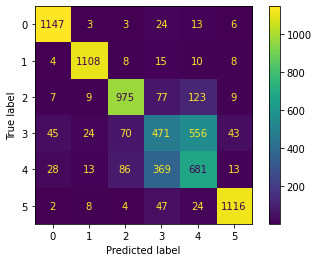

In [148]:
# Confusion Matrix
cm_test_imp1 = confusion_matrix(y_test, y_pred_imp1)
ConfusionMatrixDisplay(cm_test_imp1).plot()

Dari visualisasi di-atas dapat disimpulkan bahwa :
- Model banyak melakukan salah prediksi pada kelas 3 dan 4 (not cyberbullying dan other cyberbullying)
- Kesalahan prediksi pada kelas 3 (not cyberbullying) banyak diprediksi sebagai kelas 2 (gender) dan 4 (other cyberbullying)
- Kesalahan prediksi pada kelas 4 (other cyber bullying) banyak diprediksi sebagai kelas 2 (gender) dan 3 (not cyberbullying)
- Untuk kelas selain 3 & 4, kesalahan prediksi dibawah 100 tweet per kelas salah prediksi

Kemudian saya akan coba cek karakteristik salah prediksi untuk setiap kelasnya

In [184]:
# Memisahkan DF untuk cek karakteristik
df_act_pred_imp1['tweet_list'] = df_act_pred_imp1['tweet_processed'].apply(lambda x:str(x).split())
not_cyberbullying_type_imp1 = df_act_pred_imp1[(df_act_pred_imp1['actual']==3) | (df_act_pred_imp1['prediction']==3)]
gender_type_imp1 = df_act_pred_imp1[(df_act_pred_imp1['actual']==2)| (df_act_pred_imp1['prediction']==2)]
religion_type_imp1 = df_act_pred_imp1[(df_act_pred_imp1['actual']==5)| (df_act_pred_imp1['prediction']==5)]
other_cyberbullying_type_imp1 = df_act_pred_imp1[(df_act_pred_imp1['actual']==4) | (df_act_pred_imp1['prediction']==4)]
age_type_imp1 = df_act_pred_imp1[(df_act_pred_imp1['actual']==0) | (df_act_pred_imp1['prediction']==0)]
ethnicity_type_imp1 = df_act_pred_imp1[(df_act_pred_imp1['actual']==1) | (df_act_pred_imp1['prediction']==1)]

### 1. Karakteristik Salah Prediksi Kelas `age`

Saya akan coba print top 20 kata untuk False Positif dan False Negatif

In [187]:
# Pembagian FP dan FN
age_type_imp1_FP = age_type_imp1[(age_type_imp1['actual']!=0) &(age_type_imp1['prediction']==0)]
age_type_imp1_FN = age_type_imp1[(age_type_imp1['actual']==0) &(age_type_imp1['prediction']!=0)]

In [188]:
# Top Words FP
topFP_age = Counter([item for sublist in age_type_imp1_FP['tweet_list'] for item in sublist])
topFP_age_list1 = pd.DataFrame(topFP_age.most_common(20))
topFP_age_list1.columns = ['Words','Count']

# Top Words FN
topFN_age = Counter([item for sublist in age_type_imp1_FN['tweet_list'] for item in sublist])
topFN_age_list1 = pd.DataFrame(topFN_age.most_common(20))
topFN_age_list1.columns = ['Words','Count']

<function matplotlib.pyplot.show(*args, **kw)>

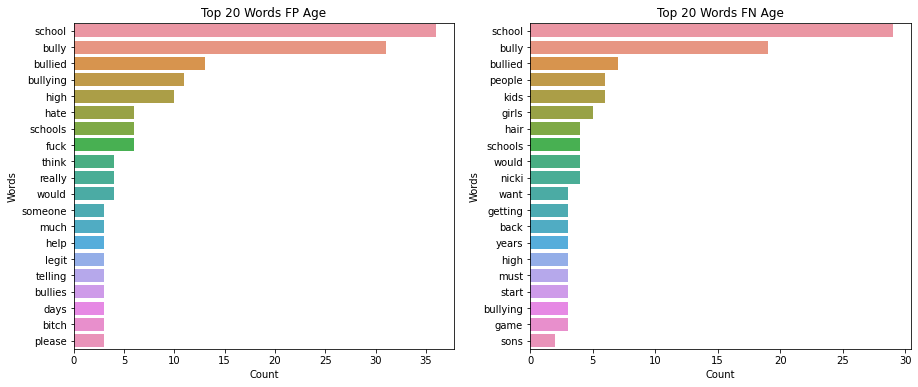

In [192]:
# Visualisasi FP dan FP
fig, ax =plt.subplots(1,2,figsize=(15,6))
sns.barplot(x='Count', y='Words', data =topFP_age_list1, orientation= 'horizontal', ax=ax[0]).set(title= 'Top 20 Words FP Age')
sns.barplot(x='Count', y='Words', data =topFN_age_list1, orientation= 'horizontal', ax=ax[1]).set(title= 'Top 20 Words FN Age')
plt.show

Dari infromasi diatas dapat disimpulkan bahwa : 
- Model akan salah prediksi FP jika tweet memiliki kata-kata school, bully, bullied, bullying, high. Kemungkinan salah prediksi karena kata-kata tersebut adalah kata umum yang digunakan pada kategori tweet lainnya
- Model akan salah prediksi FN jika tweet memiliki kata-kata school, bully, bulied, people, kids. Kemungkinan salah prediksi karena kata-kata tersebut adalah kata umum yang digunakan pada kategori tweet lainnya

### 2. Karakteristik Salah Prediksi Kelas `ethnicity`

Saya akan coba print top 20 kata untuk False Positif dan False Negatif

In [193]:
# Pembagian FP dan FN
ethnicity_type_imp1_FP = ethnicity_type_imp1[(ethnicity_type_imp1['actual']!=0) &(ethnicity_type_imp1['prediction']==0)]
ethnicity_type_imp1_FN = ethnicity_type_imp1[(ethnicity_type_imp1['actual']==0) &(ethnicity_type_imp1['prediction']!=0)]

In [194]:
# Top Words FP
topFP_ethnicity = Counter([item for sublist in ethnicity_type_imp1_FP['tweet_list'] for item in sublist])
topFP_ethnicity_list1 = pd.DataFrame(topFP_ethnicity.most_common(20))
topFP_ethnicity_list1.columns = ['Words','Count']

# Top Words FN
topFN_ethnicity = Counter([item for sublist in ethnicity_type_imp1_FN['tweet_list'] for item in sublist])
topFN_ethnicity_list1 = pd.DataFrame(topFN_ethnicity.most_common(20))
topFN_ethnicity_list1.columns = ['Words','Count']

<function matplotlib.pyplot.show(*args, **kw)>

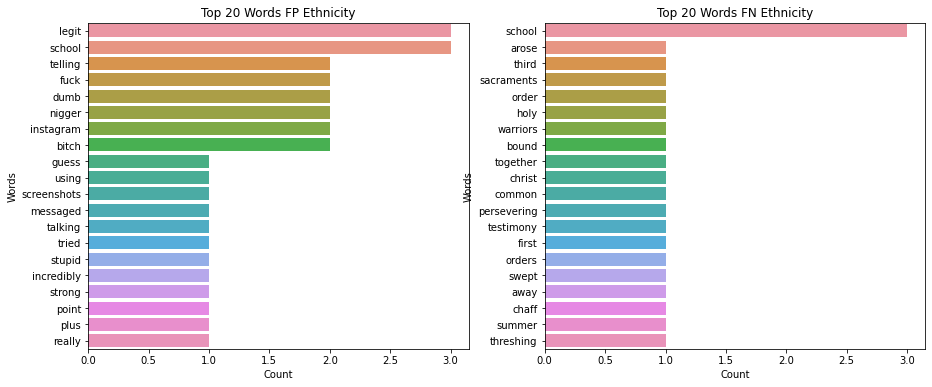

In [195]:
# Visualisasi FP dan FP
fig, ax =plt.subplots(1,2,figsize=(15,6))
sns.barplot(x='Count', y='Words', data =topFP_ethnicity_list1, orientation= 'horizontal', ax=ax[0]).set(title= 'Top 20 Words FP Ethnicity')
sns.barplot(x='Count', y='Words', data =topFN_ethnicity_list1, orientation= 'horizontal', ax=ax[1]).set(title= 'Top 20 Words FN Ethnicity')
plt.show

Dari infromasi diatas dapat disimpulkan bahwa : 
- Model akan salah prediksi FP jika tweet memiliki kata-kata legit, school, telling, fuck, dumb
- Model akan salah prediksi FN jika tweet memiliki kata-kata school, arose, third, sacraments, order dll

### 3. Karakteristik Salah Prediksi Kelas `gender`

Saya akan coba print top 20 kata untuk False Positif dan False Negatif

In [196]:
# Pembagian FP dan FN
gender_type_imp1_FP = gender_type_imp1[(gender_type_imp1['actual']!=0) &(gender_type_imp1['prediction']==0)]
gender_type_imp1_FN = gender_type_imp1[(gender_type_imp1['actual']==0) &(gender_type_imp1['prediction']!=0)]

In [197]:
# Top Words FP
topFP_gender = Counter([item for sublist in gender_type_imp1_FP['tweet_list'] for item in sublist])
topFP_gender_list1 = pd.DataFrame(topFP_gender.most_common(20))
topFP_gender_list1.columns = ['Words','Count']

# Top Words FN
topFN_gender = Counter([item for sublist in gender_type_imp1_FN['tweet_list'] for item in sublist])
topFN_gender_list1 = pd.DataFrame(topFN_gender.most_common(20))
topFN_gender_list1.columns = ['Words','Count']

<function matplotlib.pyplot.show(*args, **kw)>

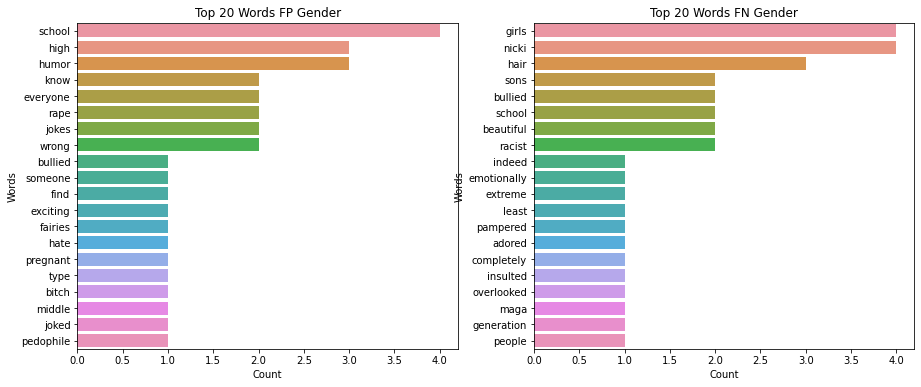

In [198]:
# Visualisasi FP dan FP
fig, ax =plt.subplots(1,2,figsize=(15,6))
sns.barplot(x='Count', y='Words', data =topFP_gender_list1, orientation= 'horizontal', ax=ax[0]).set(title= 'Top 20 Words FP Gender')
sns.barplot(x='Count', y='Words', data =topFN_gender_list1, orientation= 'horizontal', ax=ax[1]).set(title= 'Top 20 Words FN Gender')
plt.show

Dari infromasi diatas dapat disimpulkan bahwa : 
- Model akan salah prediksi FP jika tweet memiliki kata-kata school, high, humor, know, everyone
- Model akan salah prediksi FN jika tweet memiliki kata-kata girls, nicki, hair, sons, bullied

### 4. Karakteristik Salah Prediksi Kelas `not_cyberbullying`

Saya akan coba print top 20 kata untuk False Positif dan False Negatif

In [199]:
# Pembagian FP dan FN
not_cyberbullying_type_imp1_FP = not_cyberbullying_type_imp1[(not_cyberbullying_type_imp1['actual']!=0) &(not_cyberbullying_type_imp1['prediction']==0)]
not_cyberbullying_type_imp1_FN = not_cyberbullying_type_imp1[(not_cyberbullying_type_imp1['actual']==0) &(not_cyberbullying_type_imp1['prediction']!=0)]

In [200]:
# Top Words FP
topFP_not_cyberbullying = Counter([item for sublist in not_cyberbullying_type_imp1_FP['tweet_list'] for item in sublist])
topFP_not_cyberbullying_list1 = pd.DataFrame(topFP_not_cyberbullying.most_common(20))
topFP_not_cyberbullying_list1.columns = ['Words','Count']

# Top Words FN
topFN_not_cyberbullying = Counter([item for sublist in not_cyberbullying_type_imp1_FN['tweet_list'] for item in sublist])
topFN_not_cyberbullying_list1 = pd.DataFrame(topFN_not_cyberbullying.most_common(20))
topFN_not_cyberbullying_list1.columns = ['Words','Count']

<function matplotlib.pyplot.show(*args, **kw)>

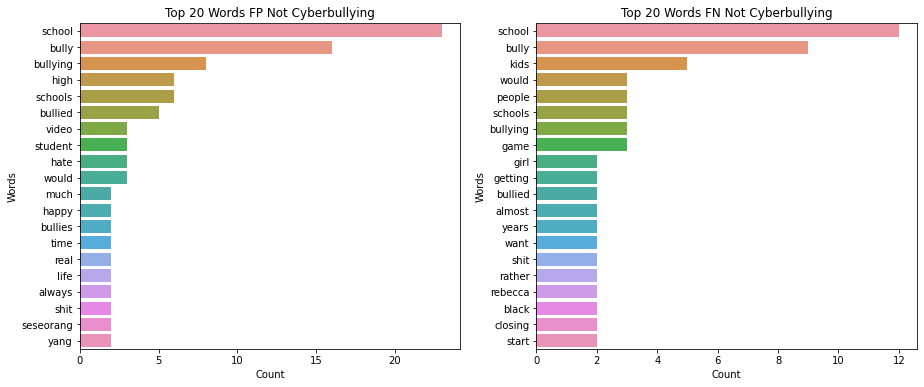

In [201]:
# Visualisasi FP dan FP
fig, ax =plt.subplots(1,2,figsize=(15,6))
sns.barplot(x='Count', y='Words', data =topFP_not_cyberbullying_list1, orientation= 'horizontal', ax=ax[0]).set(title= 'Top 20 Words FP Not Cyberbullying')
sns.barplot(x='Count', y='Words', data =topFN_not_cyberbullying_list1, orientation= 'horizontal', ax=ax[1]).set(title= 'Top 20 Words FN Not Cyberbullying')
plt.show

Dari infromasi diatas dapat disimpulkan bahwa : 
- Model akan salah prediksi FP jika tweet memiliki kata-kata school, bully, bullying, high, schools
- Model akan salah prediksi FN jika tweet memiliki kata-kata school, bully, kids, would, people

### 5. Karakteristik Salah Prediksi Kelas `other_cyberbullying`

Saya akan coba print top 20 kata untuk False Positif dan False Negatif

In [202]:
# Pembagian FP dan FN
other_cyberbullying_type_imp1_FP = other_cyberbullying_type_imp1[(other_cyberbullying_type_imp1['actual']!=0) &(other_cyberbullying_type_imp1['prediction']==0)]
other_cyberbullying_type_imp1_FN = other_cyberbullying_type_imp1[(other_cyberbullying_type_imp1['actual']==0) &(other_cyberbullying_type_imp1['prediction']!=0)]

In [203]:
# Top Words FP
topFP_other_cyberbullying = Counter([item for sublist in other_cyberbullying_type_imp1_FP['tweet_list'] for item in sublist])
topFP_other_cyberbullying_list1 = pd.DataFrame(topFP_other_cyberbullying.most_common(20))
topFP_other_cyberbullying_list1.columns = ['Words','Count']

# Top Words FN
topFN_other_cyberbullying = Counter([item for sublist in other_cyberbullying_type_imp1_FN['tweet_list'] for item in sublist])
topFN_other_cyberbullying_list1 = pd.DataFrame(topFN_other_cyberbullying.most_common(20))
topFN_other_cyberbullying_list1.columns = ['Words','Count']

<function matplotlib.pyplot.show(*args, **kw)>

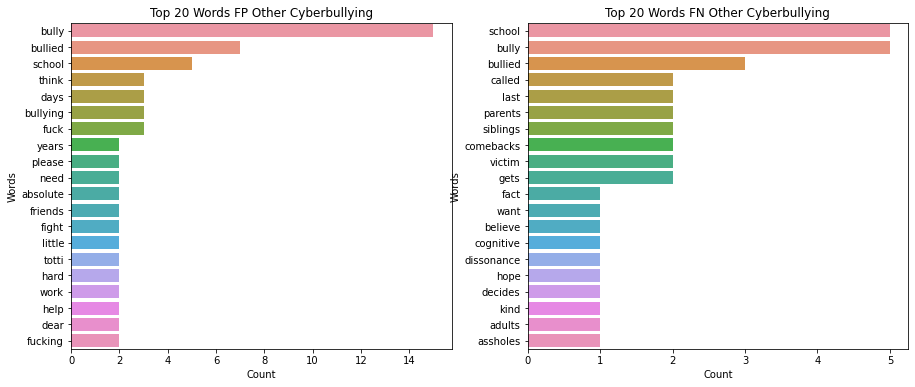

In [204]:
# Visualisasi FP dan FP
fig, ax =plt.subplots(1,2,figsize=(15,6))
sns.barplot(x='Count', y='Words', data =topFP_other_cyberbullying_list1, orientation= 'horizontal', ax=ax[0]).set(title= 'Top 20 Words FP Other Cyberbullying')
sns.barplot(x='Count', y='Words', data =topFN_other_cyberbullying_list1, orientation= 'horizontal', ax=ax[1]).set(title= 'Top 20 Words FN Other Cyberbullying')
plt.show

Dari infromasi diatas dapat disimpulkan bahwa : 
- Model akan salah prediksi FP jika tweet memiliki kata-kata bully, bullied, school, think, days
- Model akan salah prediksi FN jika tweet memiliki kata-kata school, bully, bullied, called, last

### 6. Karakteristik Salah Prediksi Kelas `religion`

Saya akan coba print top 20 kata untuk False Positif dan False Negatif

In [205]:
# Pembagian FP dan FN
religion_type_imp1_FP = religion_type_imp1[(religion_type_imp1['actual']!=0) &(religion_type_imp1['prediction']==0)]
religion_type_imp1_FN = religion_type_imp1[(religion_type_imp1['actual']==0) &(religion_type_imp1['prediction']!=0)]

In [206]:
# Top Words FP
topFP_religion = Counter([item for sublist in religion_type_imp1_FP['tweet_list'] for item in sublist])
topFP_religion_list1 = pd.DataFrame(topFP_religion.most_common(20))
topFP_religion_list1.columns = ['Words','Count']

# Top Words FN
topFN_religion = Counter([item for sublist in religion_type_imp1_FN['tweet_list'] for item in sublist])
topFN_religion_list1 = pd.DataFrame(topFN_religion.most_common(20))
topFN_religion_list1.columns = ['Words','Count']

<function matplotlib.pyplot.show(*args, **kw)>

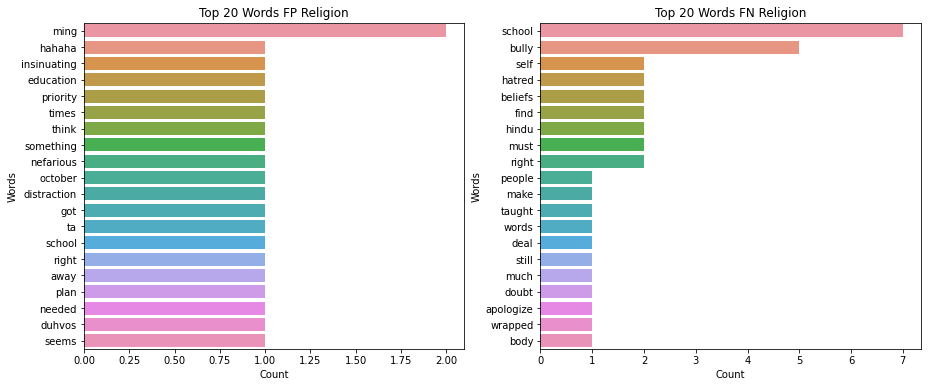

In [207]:
# Visualisasi FP dan FP
fig, ax =plt.subplots(1,2,figsize=(15,6))
sns.barplot(x='Count', y='Words', data =topFP_religion_list1, orientation= 'horizontal', ax=ax[0]).set(title= 'Top 20 Words FP Religion')
sns.barplot(x='Count', y='Words', data =topFN_religion_list1, orientation= 'horizontal', ax=ax[1]).set(title= 'Top 20 Words FN Religion')
plt.show

Dari infromasi diatas dapat disimpulkan bahwa : 
- Model akan salah prediksi FP jika tweet memiliki kata-kata ming, hahaha, insinuating, education, priority
- Model akan salah prediksi FN jika tweet memiliki kata-kata school, bully, self, hatred, beliefs

# 10 - Model Baseline GRU (Training, Evaluation & Analysis)

Bagian ini dibagi menjadi 3 yaitu *Training Model*, *Evaluatin Model* dan *Analysis Model*. Evaluasi Model lebih ke arah *metrics* sedangkan Analisis Model lebih ke arah bisnis dan kecenderungan prediksi model

## 10-1 Model Training

Untuk Model Baseline GRU saya menggunakan *rules* yang sama dengan Model Baseline LSTM akan tetapi ada beberapa perbedaan dengan Model Baseline LSTM. Untuk perbedaan akan saya cetak dengan huruf tebal

- Menggunakan Sequential API. Karena untuk model Baseline saya usahakan se-simple mungkin agar nanti dapat mengetahui apa yang perlu ditingkatkan dari model tersebut
- *Hidden* layer inisialisasi adalah 5 layer karena jumlah data 47.000
- *Neuron* menggunakan *geometric progression* menurun dimulai dari 128 Neuron
- *Optimizer* inisialisasi menggunakan **Adam** karena optimizer memiliki waktu konvergen yang cepat
-  Menggunakan GRU karena memiliki waktu *training* yang cepat
-  Menggunakan *embedding* dengan  ***output dimension* 64**

**Note : Bold adalah perbedaan arsitektur Baseline LSTM dengan GRU**

In [270]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [271]:
# Embedding Layer

embedding_baseline2 = Embedding(input_dim=jml_vocab,
                      output_dim=64,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len
                      )

In [272]:
# Penyusunan Model
model_baseline2 = Sequential()

# Layer Text Vectorization
model_baseline2.add(text_vectorization)

# Layer Embedding
model_baseline2.add(embedding_baseline2)


# Hidden Layer 1
model_baseline2.add(GRU(128, return_sequences=True))

# Hidden Layer 2
model_baseline2.add(GRU(64, return_sequences=True))

# Hidden Layer 3
model_baseline2.add(GRU(32, return_sequences=True))

# Hidden Layer 4
model_baseline2.add(GRU(16, return_sequences=True))

# Hidden Layer 5
model_baseline2.add(GRU(8))

# Layer Output
model_baseline2.add(Dense(6,activation='softmax'))

# Compile
model_baseline2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy','AUC'])

# Summary
model_baseline2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 310)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 310, 64)           2425984   
                                                                 
 gru (GRU)                   (None, 310, 128)          74496     
                                                                 
 gru_1 (GRU)                 (None, 310, 64)           37248     
                                                                 
 gru_2 (GRU)                 (None, 310, 32)           9408      
                                                                 
 gru_3 (GRU)                 (None, 310, 16)           2400      
                                                        

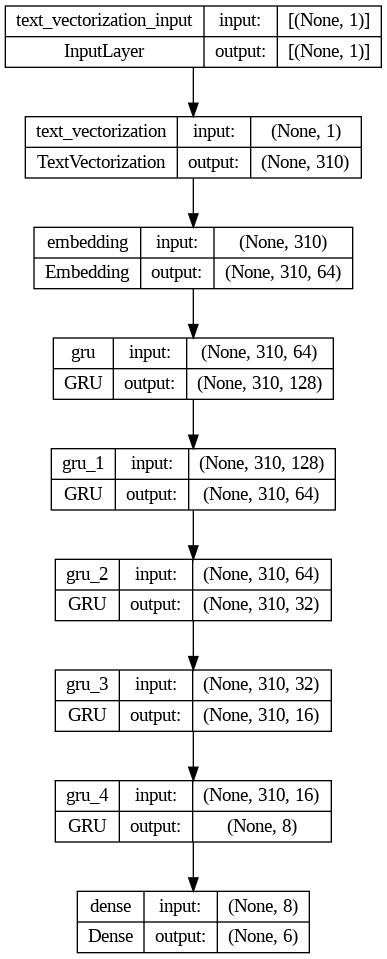

In [273]:
# Plot Layers
tf.keras.utils.plot_model(model_baseline2, show_shapes=True)

Model GRU Baseline mempunyai 9 layer yang terdiri dari *input layer*, *text vectorization layer*, *embedding layer*, 5 GRU *hidden layer* dan 1 *output layer*. Untuk penjelasan tiap layer adalah sebagai berikut :

1. *Input Layer*

  Layer ini menerima *input* dengan dimensi (0,1)

2. *Text Vectorization Layer*

  *Layer* ini menerima *input* dari *input layer* kemudian mengubahnya menjadi bentuk vektor dengan dimensi (0,310)

3. *Embedding Layer*

  Kemudian vektor tersebut akan dilakukan embedding dengan 2.425.984 parameter dan menghasilkan *output* dengan dimensi (0,310,64)

4. *Hidden Layer GRU 1*

  Kemudian *output* dari *embedding layer* akan di-*training* di *hidden layer GRU 1* dengan 247.296 parameter dan menghasilkan *output* dengan dimensi (0,310,256)

5. *Hidden Layer GRU 2*

  Kemudian *output* dari *hidden layer GRU 1* akan di-*training* di *hidden layer GRU 2* dengan 148.224 parameter dan menghasilkan *output* dengan dimensi (0,310,128)

6. *Hidden Layer GRU 3*

  Kemudian *output* dari *hidden layer GRU 2* akan di-*training* di *hidden layer GRU 3* dengan 37.428 parameter dan menghasilkan *output* dengan dimensi (0,310,64)

7. *Hidden Layer GRU 4*

  Kemudian *output* dari *hidden layer GRU 3* akan di-*training* di *hidden layer GRU 4* dengan 9.408 parameter dan menghasilkan *output* dengan dimensi (0,310,32)

8. *Hidden Layer GRU 5*

  Kemudian *output* dari *hidden layer GRU 4* akan di-*training* di *hidden layer GRU 5* dengan 2400 parameter dan menghasilkan *output* dengan dimensi (0,16)

9. *Output Layer*

  Kemudian *output* dari *hidden layer GRU 5* akan di-*training* di *output layer* dengan 102 parameter untuk menghasilkan *output* dengan dimensi (0,6)



Selanjutnya adalah *training model baseline* GRU 

In [274]:
# Train the Model
model_baseline2_hist = model_baseline2.fit(train_pipe, epochs=30, validation_data=val_pipe)

Epoch 1/30
1076/1076 [==============================] - 78s 65ms/step - loss: 1.7925 - accuracy: 0.1649 - auc: 0.4975 - val_loss: 1.7919 - val_accuracy: 0.1595 - val_auc: 0.4966
Epoch 2/30
1076/1076 [==============================] - 54s 51ms/step - loss: 1.7922 - accuracy: 0.1676 - auc: 0.4996 - val_loss: 1.7918 - val_accuracy: 0.1769 - val_auc: 0.5036
Epoch 3/30
1076/1076 [==============================] - 53s 49ms/step - loss: 1.7921 - accuracy: 0.1628 - auc: 0.4999 - val_loss: 1.7922 - val_accuracy: 0.1595 - val_auc: 0.4967
Epoch 4/30
1076/1076 [==============================] - 52s 48ms/step - loss: 1.7921 - accuracy: 0.1640 - auc: 0.4986 - val_loss: 1.7920 - val_accuracy: 0.1716 - val_auc: 0.5017
Epoch 5/30
1076/1076 [==============================] - 53s 49ms/step - loss: 1.7919 - accuracy: 0.1663 - auc: 0.5014 - val_loss: 1.7926 - val_accuracy: 0.1595 - val_auc: 0.4967
Epoch 6/30
1076/1076 [==============================] - 52s 48ms/step - loss: 1.7920 - accuracy: 0.1680 - auc:

## 10-2 Model Evaluation (Evaluasi Berdasarkan Metrics)

Saya akan coba membuat dataframe agar memudahkan *tracking score* pada setiap *epoch* 

In [275]:
# Create DataFrame

history_baseline2_df = pd.DataFrame(model_baseline2_hist.history)
history_baseline2_df.tail(5)

loss  accuracy       auc  val_loss  val_accuracy   val_auc
25  1.791907  0.167528  0.500001  1.791934      0.159454  0.499375
26  1.791872  0.166744  0.500598  1.791889      0.159454  0.499375
27  1.791888  0.166134  0.500265  1.791847      0.171631  0.505480
28  1.791865  0.163346  0.499544  1.791886      0.159454  0.501827
29  1.791858  0.166018  0.502060  1.792124      0.159454  0.494817

Setelah membuat dataframe selanjutnya adalah pembuatan visualisasi untuk memudahkan pemahaman

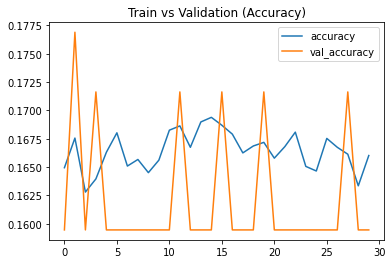

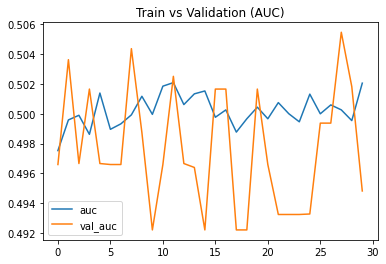

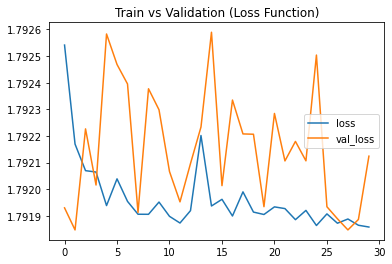

In [276]:
# Plot Traning Results

history_baseline2_df[['accuracy', 'val_accuracy']].plot(title='Train vs Validation (Accuracy)')
history_baseline2_df[['auc', 'val_auc']].plot(title='Train vs Validation (AUC)')
history_baseline2_df[['loss', 'val_loss']].plot(title='Train vs Validation (Loss Function)')

Dari visualisasi diatas dapat disimpulkan bahwa :    
- Accuracy, AUC, dan Loss pada *train-set* dan *validation-set* cenderung naik dan turun secara tidak stabil. Oleh karena itu model ini termasuk ke-dalam *problem gradient explode*
- Accuracy pada *train-set* berpusat pada 17% yang artinya model hanya mampu memprediksi 17% dari data *train-set*. Selain itu nilai ini menunjukkan bahwa model tidak dapat belajar dari data *train*
- Accuracy pada *validation-set* juga berpusat pada 17% yang artinya model tidak dapat memprediksi dengan benar
- AUC pada *train-set* dan *validation-set* memiliki nilai yang buruk yaitu berpusat pada 0.4-0.5 dan tidak stabil pada setiap epoch-nya. Artinya model sangat dipengaruhi oleh treshold
- Loss pada *train-set* dan *validation-set* memiliki nilai yang tinggi dan tidak stabil (berpusat di antara 1.79). Artinya model ini masih belum menemukan titik konvergen nya (karena kalau konvergen seharusnya stabil)

Kemudian saya akan coba lakukan evaluasi pada *test-set*

In [277]:
# Model Evaluation of test-set

y_pred_baseline2 = np.argmax(model_baseline2.predict(X_test), axis=-1)

print(classification_report(y_test, y_pred_baseline2))

224/224 [==============================] - 8s 19ms/step
              precision    recall  f1-score   support

           0       0.17      1.00      0.29      1196
           1       0.00      0.00      0.00      1153
           2       0.00      0.00      0.00      1200
           3       0.00      0.00      0.00      1209
           4       0.00      0.00      0.00      1190
           5       0.00      0.00      0.00      1201

    accuracy                           0.17      7149
   macro avg       0.03      0.17      0.05      7149
weighted avg       0.03      0.17      0.05      7149



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [278]:
# Perhitungan AUC
prob_baseline2 = model_baseline2.predict(X_test)
auc_baseline2 = roc_auc_score(y_test, prob_baseline2, multi_class='ovr')
auc_baseline2

224/224 [==============================] - 4s 18ms/step


0.5

Dari informasi diatas dapat disimpulkan bahwa :
- Model memprediksi semua data ke kelas 0 (Jenis `Age`)
- Berdasarkan nilai *AUC* (0.5), dapat disimpulkan bahwa model dipengaruhi oleh *treshold*
- Nilai `Accuracy` *train-set* (epoch terakhir) dan *test-set* memiliki nilai yang sangat rendah, untuk *train-set* di angka 17% sedangkan untuk *test-set* di angka 17%. Yang artinya **model tersebut underfit**
- Model memiliki akurasi 17% yang artinya model tidak dapat mengklasifikasikan kelas tweet dengan baik  (karena diatas *acceptable score* pada poin model definition)

## 10-3 Model Analysis (Evaluasi Berdasarkan Bisnis/Kecenderungan prediksi model)

Sebelum analisis lebih lanjut saya akan membuat *dataframe* untuk membandingkan hasil prediksi dan aktual

In [279]:
# Pembuatan DF Act vs Pred
act_pred_baseline2 = pd.DataFrame({
            'actual' : y_test,
            'prediction' : np.ndarray.flatten(y_pred_baseline2)
})
df_act_pred_baseline2 = pd.concat([pd.DataFrame(X_test), act_pred_baseline2],axis=1)
df_act_pred_baseline2 

tweet_processed  actual  prediction
18963  want world calling half muslims idiots encoura...       5           0
39710  truth truth subjective science unlike vulgar a...       0           0
40710  stand niggers expect black fail everything fuc...       1           0
40441                       look since niggers damn dumb       1           0
1120                          oohnicoleee smiling retard       3           0
...                                                  ...     ...         ...
44386  blessings heaped upon american negro nights wo...       1           0
26404                               tell stop pair bully       4           0
26379                                                          4           0
21071  right anything muslims idiots never enough mug...       5           0
5369        great comeback manu cook good food next time       3           0

[7149 rows x 3 columns]

Saya akan coba *plot confusion matrix* untuk mengecek kecenderungan prediksi model 

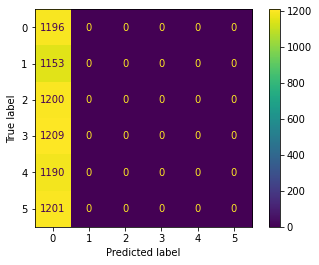

In [280]:
# Confusion Matrix
cm_test_baseline2 = confusion_matrix(y_test, y_pred_baseline2)
ConfusionMatrixDisplay(cm_test_baseline2).plot()

Dari informasi diatas dapat disimpulkan bahwa :
1. Model memprediksi semua data menjadi kelas 0 (*age*)

# 11 - Model Improvement GRU (Training, Evaluation & Analysis)

Bagian ini dibagi menjadi 3 yaitu *Training Model*, *Evaluatin Model* dan *Analysis Model*. Evaluasi Model lebih ke arah *metrics* sedangkan Analisis Model lebih ke arah bisnis dan kecenderungan prediksi model

## 11-1 Model Training

Berdasarkan Evaluasi Model Baseline GRU maka saya melakukan *improve* sebagai berikut:

- Jumlah Neuron dan Layer tidak dapat dikurangi karena jika dilihat dari hasil *train*, *validation* dan *test* dapat dilihat bahwa **Model Baseline GRU memiliki *score* yang sangat rendah. Artinya, model tersebut kurang belajar**

- **Menambahkan layer Bidirectional Layer agar model dapat belajar dua arah, dari backward dan forward**
- *Neuron* menggunakan *geometric progression* menurun 256,128,64,32 dll. **Geometric Progression dimulai dari 256 agar model dapat lebih banyak belajar**
- *Optimizer* inisialisasi tetap menggunakan Adam karena optimizer memiliki waktu konvergen yang cepat (saya sudah mencoba training dengan beberapa optimizer lainnnya akan tetapi hasilnya tidak jauh berbeda)
- **Menggunakan *transfer learning embedding* yang sudah dilatih dengan milyaran data. Layer ini dapat menemukan semantik dari setiap kalimat yang mirip seperti pada paper kalimat 'How old are you?' dan 'What is your age?' memiliki tingkat kemiripan 98%. Selain itu model ini universal dan dapat digunakan untuk berbagai kasus. Akan tetapi saya akan menggunakan versi lite agar training tidak lama (https://tfhub.dev/google/collections/nnlm/1,https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf)**

**Cetak Bold : Improvement yang dilakukan**


**Note *training* yang telah dicoba :** 
1. Saya sudah coba melakukan *training* dengan menambah neuron (menggunakan geometric progression) dan layer (10 layer) akan tetapi performa tidak berubah banyak oleh karena itu saya menggunakan neuron dan layer sama dengan baseline
2. Saya sudah mencoba training dengan beberapa optimizer lainnnya akan tetapi hasilnya tidak jauh berbeda 
3. Saya sudah mencoba *training* dengan dropout dan normalization akan tetapi performa model menjadi semakin buruk. Oleh karena itu untuk *improvement* saya cukup menambahkan *Bidirectional Layer* dan *Transfer Learning*

In [92]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [93]:
# Layer Transfer learning
hub_layer = hub.KerasLayer("https://tfhub.dev/google/nnlm-en-dim50/2", output_shape=[],
                           input_shape=[], dtype=tf.string,trainable=False)


In [94]:
# Penyusunan Model
model_imp2 = Sequential()

# Layer Transfer Learning
model_imp2.add(hub_layer)

# Reshape Layer
model_imp2.add(tf.keras.layers.Reshape((50, 1)))

# Hidden Layer 1
model_imp2.add(tf.keras.layers.Bidirectional(GRU(256, return_sequences=True)))

# Hidden Layer 2
model_imp2.add(tf.keras.layers.Bidirectional(GRU(128, return_sequences=True)))

# Hidden Layer 3
model_imp2.add(tf.keras.layers.Bidirectional(GRU(64, return_sequences=True)))

# Hidden Layer 4
model_imp2.add(tf.keras.layers.Bidirectional(GRU(32, return_sequences=True)))

# Hidden Layer 5
model_imp2.add(tf.keras.layers.Bidirectional(GRU(16)))

# Layer Output
model_imp2.add(Dense(6,activation='softmax'))

# Compile
model_imp2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy','AUC'])

# Summary
model_imp2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 reshape (Reshape)           (None, 50, 1)             0         
                                                                 
 bidirectional (Bidirectiona  (None, 50, 512)          397824    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 50, 256)          493056    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 50, 128)          123648    
 nal)                                                            
                                                        

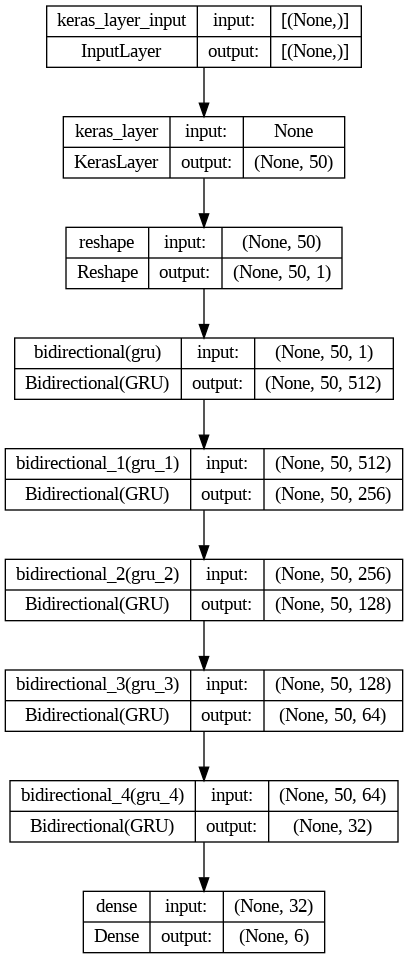

In [95]:
# Plot Layers
tf.keras.utils.plot_model(model_imp2,show_shapes=True)

Model GRU Baseline mempunyai 7 layer yang terdiri dari *transfer learning layer*, 5 GRU *hidden layer* dan 1 *output layer*. Untuk penjelasan tiap layer adalah sebagai berikut :

1. *Input Layer*

  Layer ini menerima *input* dengan dimensi (0,1)

2. *Transfer Learning Layer*

  Kemudian *output* dari *input layer* akan di-*training* di *transfer learning layer* dengan 48.190.600 parameter dan menghasilkan output (0,50)

3. *Hidden Layer GRU 1*

  Kemudian *output* dari *embedding layer* akan di-*training* di *hidden layer GRU 1* dengan 397.824 parameter dan menghasilkan *output* dengan dimensi (0,50,512)

4. *Hidden Layer GRU 2*

  Kemudian *output* dari *hidden layer GRU 1* akan di-*training* di *hidden layer GRU 2* dengan 493.056 parameter dan menghasilkan *output* dengan dimensi (0,50,256)

5. *Hidden Layer GRU 3*

  Kemudian *output* dari *hidden layer GRU 2* akan di-*training* di *hidden layer GRU 3* dengan 123.648 parameter dan menghasilkan *output* dengan dimensi (0,50,128)

6. *Hidden Layer GRU 4*

  Kemudian *output* dari *hidden layer GRU 3* akan di-*training* di *hidden layer GRU 4* dengan 31.104 parameter dan menghasilkan *output* dengan dimensi (0,310,64)

7. *Hidden Layer GRU 5*

  Kemudian *output* dari *hidden layer GRU 4* akan di-*training* di *hidden layer GRU 5* dengan 7.872 parameter dan menghasilkan *output* dengan dimensi (0,32)

8. *Output Layer*

  Kemudian *output* dari *hidden layer GRU 5* akan di-*training* di *output layer* dengan 198 parameter untuk menghasilkan *output* dengan dimensi (0,6)



Selanjutnya adalah *training* model *improvement GRU*

In [96]:
# Train the Model
model_imp2_hist = model_imp2.fit(train_pipe, epochs=30, validation_data=val_pipe)

Epoch 1/30
1076/1076 [==============================] - 55s 34ms/step - loss: 1.1251 - accuracy: 0.5596 - auc: 0.8702 - val_loss: 0.9255 - val_accuracy: 0.6327 - val_auc: 0.9135
Epoch 2/30
1076/1076 [==============================] - 39s 36ms/step - loss: 0.8821 - accuracy: 0.6472 - auc: 0.9213 - val_loss: 0.8685 - val_accuracy: 0.6564 - val_auc: 0.9239
Epoch 3/30
1076/1076 [==============================] - 47s 44ms/step - loss: 0.8047 - accuracy: 0.6775 - auc: 0.9344 - val_loss: 0.7933 - val_accuracy: 0.6816 - val_auc: 0.9365
Epoch 4/30
1076/1076 [==============================] - 40s 38ms/step - loss: 0.7592 - accuracy: 0.6957 - auc: 0.9416 - val_loss: 0.7727 - val_accuracy: 0.6936 - val_auc: 0.9397
Epoch 5/30
1076/1076 [==============================] - 46s 42ms/step - loss: 0.7271 - accuracy: 0.7071 - auc: 0.9463 - val_loss: 0.7551 - val_accuracy: 0.6931 - val_auc: 0.9422
Epoch 6/30
1076/1076 [==============================] - 34s 32ms/step - loss: 0.6935 - accuracy: 0.7187 - auc:

## 11-2 Model Evaluation (Evaluasi Berdasarkan Metrics)

Saya akan coba membuat dataframe agar memudahkan *tracking score* pada setiap *epoch* 

In [97]:
# Create DataFrame

history_imp2_df = pd.DataFrame(model_imp2_hist.history)
history_imp2_df.tail(5)

loss  accuracy       auc  val_loss  val_accuracy   val_auc
25  0.195180  0.921783  0.995601  1.341653      0.680764  0.913299
26  0.196033  0.920215  0.995398  1.345129      0.683726  0.912222
27  0.181926  0.926024  0.996101  1.378527      0.681751  0.911946
28  0.176653  0.928667  0.996294  1.390167      0.683232  0.911893
29  0.182914  0.925995  0.995901  1.429621      0.676321  0.910470

Setelah membuat dataframe selanjutnya adalah pembuatan visualisasi untuk memudahkan pemahaman

(0.0, 3.0)

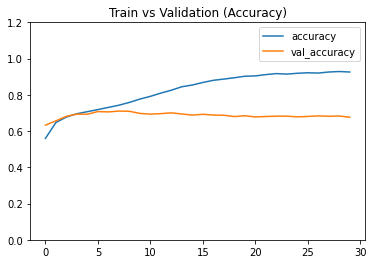

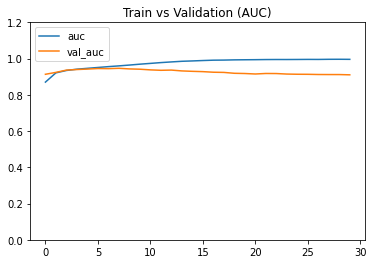

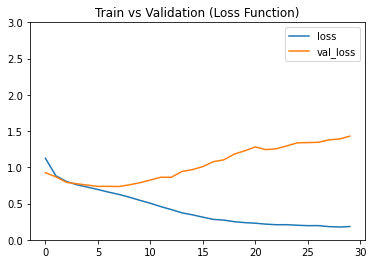

In [208]:
# Plot Traning Results

history_imp2_df[['accuracy', 'val_accuracy']].plot(title='Train vs Validation (Accuracy)')
plt.ylim(0,1.2)
history_imp2_df[['auc', 'val_auc']].plot(title='Train vs Validation (AUC)')
plt.ylim(0,1.2)
history_imp2_df[['loss', 'val_loss']].plot(title='Train vs Validation (Loss Function)')
plt.ylim(0,3)

Dari visualisasi diatas dapat disimpulkan bahwa :    
- Accuracy *train-set* dan Accuracy *validation-set* memiliki selisih yang cukup jauh antara 20% akan tetapi model ini memiliki performa yang lebih baik dari pada baseline. Accuracy *train-set* berpusat pada 92% sedangkan untuk *validation-set* berpusat pada 68%. Sedangkan untuk Accuracy baseline terpusat pada 17% pada *train-set* dan *validation-set*. **Sehingga model ini dapat meningkatkan Accuracy sebesar 50% dari pada baseline**. Akan tetapi model ini masih masuk ke dalam **problem overfit**. **Note : saya sudah mencoba melakukan regularisasi, dropout dan normalisasi akan tetapi performa menjadi lebih jelek, oleh karena itu saya tidak melakukan teknik tersebut**
- Kemudian dari nilai Accuracy bisa dilihat bahwa model ini tidak dapat mengklasifikasikan kelas tweet dengan baik (akurasi sekitar 68%-70%, dibawah *acceptable score* pada poin *model definition*)
- AUC pada *train-set* dan *validation-set* memiliki nilai yang tinggi yaitu berpusat pada 0.90-0.92. Artinya model tidak dipengaruhi oleh treshold
- Loss pada *train-set* cenderung stabil dibawah 0.5 sedangkan loss pada *validation-set* cenderung tidak stabil dan menyebar di antara 1 - 1.5. Artinya model ini masih belum menemukan titik konvergen nya (karena kalau konvergen seharusnya stabil)

Kemudian saya akan coba lakukan evaluasi pada *test-set*

In [99]:
# Model Evaluation of test-set

y_pred_imp2 = np.argmax(model_imp2.predict(X_test), axis=-1)


print(classification_report(y_test, y_pred_imp2))

224/224 [==============================] - 6s 12ms/step
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1196
           1       0.82      0.83      0.82      1153
           2       0.70      0.68      0.69      1200
           3       0.39      0.37      0.38      1209
           4       0.40      0.41      0.40      1190
           5       0.82      0.83      0.82      1201

    accuracy                           0.66      7149
   macro avg       0.66      0.67      0.66      7149
weighted avg       0.66      0.66      0.66      7149



In [209]:
# Perhitungan AUC
prob_imp2 = model_imp2.predict(X_test)
auc_imp2 = roc_auc_score(y_test, prob_imp2, multi_class='ovr')
auc_imp2

224/224 [==============================] - 3s 12ms/step


0.9118804098792128

Dari informasi diatas dapat disimpulkan bahwa :
- Model memprediksi tidak dapat memprediksi dengan baik untuk beberapa kelas kecuali kelas 2, 3 dan kelas 4 (gender, not cyberbullying dan other cyberbullying)
- Berdasarkan nilai *AUC* (0.91), dapat disimpulkan bahwa model tidak dipengaruhi oleh *treshold*
- Nilai `Accuracy` *train-set* (epoch terakhir) dan *test-set* memiliki selisih yang tinggi, untuk *train-set* di angka 92% sedangkan untuk *test-set* di angka 66%. Selain itu karena nilai *test-set* dibawah *acceptable score* pada model definition maka **model ini termasuk underfit**
- Model memiliki akurasi 66% yang artinya model tidak dapat mengklasifikasikan kelas tweet dengan baik (karena dibawah *acceptable score* pada poin model definition)

## 11-3 Model Analysis (Evaluasi Berdasarkan Bisnis/Kecenderungan prediksi model)

Sebelum analisis lebih lanjut saya akan membuat *dataframe* untuk membandingkan hasil prediksi dan aktual

In [210]:
# Pembuatan DF Act vs Pred
act_pred_imp2 = pd.DataFrame({
            'actual' : y_test,
            'prediction' : np.ndarray.flatten(y_pred_imp2)
})
df_act_pred_imp2 = pd.concat([pd.DataFrame(X_test), act_pred_imp2],axis=1)
df_act_pred_imp2 

tweet_processed  actual  prediction
18963  want world calling half muslims idiots encoura...       5           5
39710  truth truth subjective science unlike vulgar a...       0           2
40710  stand niggers expect black fail everything fuc...       1           1
40441                       look since niggers damn dumb       1           4
1120                          oohnicoleee smiling retard       3           2
...                                                  ...     ...         ...
44386  blessings heaped upon american negro nights wo...       1           5
26404                               tell stop pair bully       4           4
26379                                                          4           4
21071  right anything muslims idiots never enough mug...       5           5
5369        great comeback manu cook good food next time       3           4

[7149 rows x 3 columns]

Saya akan coba *plot confusion matrix* untuk mengecek kecenderungan prediksi model 

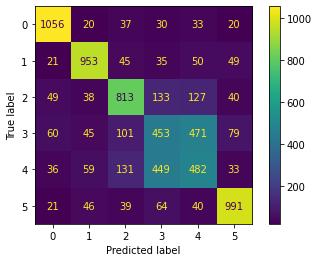

In [211]:
# Confusion Matrix
cm_test_imp2 = confusion_matrix(y_test, y_pred_imp2)
ConfusionMatrixDisplay(cm_test_imp2).plot()

Dari visualisasi di-atas dapat disimpulkan bahwa :
- Model banyak melakukan salah prediksi pada kelas 2, 3 dan 4 (gender, not cyberbullying dan other cyberbullying)
- Kesalahan prediksi pada kelas 2 (gender) banyak diprediksi sebagai kelas 3 (not cyberbullying) dan 4 (other cyberbullying)
- Kesalahan prediksi pada kelas 3 (not cyberbullying) banyak diprediksi sebagai kelas 2 (gender) dan 4 (other cyberbullying)
- Kesalahan prediksi pada kelas 4 (other cyber bullying) banyak diprediksi sebagai kelas 2 (gender) dan 3 (not cyberbullying)
- Untuk kelas selain 2,3 & 4, kesalahan prediksi dibawah 100 tweet per kelas salah prediksi

Kemudian saya akan coba cek karakteristik salah prediksi untuk setiap kelasnya

In [212]:
# Memisahkan DF untuk cek karakteristik
df_act_pred_imp2['tweet_list'] = df_act_pred_imp2['tweet_processed'].apply(lambda x:str(x).split())
not_cyberbullying_type_imp2 = df_act_pred_imp2[(df_act_pred_imp2['actual']==3) | (df_act_pred_imp2['prediction']==3)]
gender_type_imp2 = df_act_pred_imp2[(df_act_pred_imp2['actual']==2)| (df_act_pred_imp2['prediction']==2)]
religion_type_imp2 = df_act_pred_imp2[(df_act_pred_imp2['actual']==5)| (df_act_pred_imp2['prediction']==5)]
other_cyberbullying_type_imp2 = df_act_pred_imp2[(df_act_pred_imp2['actual']==4) | (df_act_pred_imp2['prediction']==4)]
age_type_imp2 = df_act_pred_imp2[(df_act_pred_imp2['actual']==0) | (df_act_pred_imp2['prediction']==0)]
ethnicity_type_imp2 = df_act_pred_imp2[(df_act_pred_imp2['actual']==1) | (df_act_pred_imp2['prediction']==1)]

### 1. Karakteristik Salah Prediksi Kelas `age`

Saya akan coba print top 20 kata untuk False Positif dan False Negatif

In [213]:
# Pembagian FP dan FN
age_type_imp2_FP = age_type_imp2[(age_type_imp2['actual']!=0) &(age_type_imp2['prediction']==0)]
age_type_imp2_FN = age_type_imp2[(age_type_imp2['actual']==0) &(age_type_imp2['prediction']!=0)]

In [215]:
# Top Words FP
topFP_age = Counter([item for sublist in age_type_imp2_FP['tweet_list'] for item in sublist])
topFP_age_list2 = pd.DataFrame(topFP_age.most_common(20))
topFP_age_list2.columns = ['Words','Count']

# Top Words FN
topFN_age = Counter([item for sublist in age_type_imp2_FN['tweet_list'] for item in sublist])
topFN_age_list2 = pd.DataFrame(topFN_age.most_common(20))
topFN_age_list2.columns = ['Words','Count']

<function matplotlib.pyplot.show(*args, **kw)>

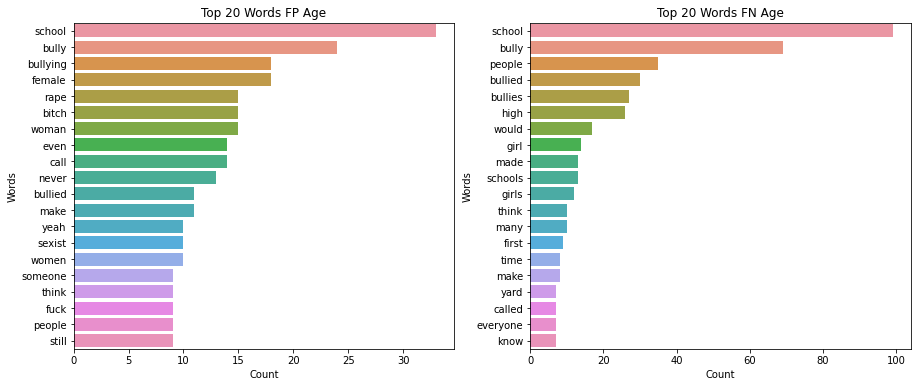

In [216]:
# Visualisasi FP dan FP
fig, ax =plt.subplots(1,2,figsize=(15,6))
sns.barplot(x='Count', y='Words', data =topFP_age_list2, orientation= 'horizontal', ax=ax[0]).set(title= 'Top 20 Words FP Age')
sns.barplot(x='Count', y='Words', data =topFN_age_list2, orientation= 'horizontal', ax=ax[1]).set(title= 'Top 20 Words FN Age')
plt.show

Dari infromasi diatas dapat disimpulkan bahwa : 
- Model akan salah prediksi FP jika tweet memiliki kata-kata school, bully, bullying, female, rape. Kemungkinan salah prediksi karena kata-kata tersebut adalah kata umum yang digunakan pada kategori tweet lainnya
- Model akan salah prediksi FN jika tweet memiliki kata-kata school, bully, people, bullied, bullies. Kemungkinan salah prediksi karena kata-kata tersebut adalah kata umum yang digunakan pada kategori tweet lainnya

### 2. Karakteristik Salah Prediksi Kelas `ethnicity`

Saya akan coba print top 20 kata untuk False Positif dan False Negatif

In [217]:
# Pembagian FP dan FN
ethnicity_type_imp2_FP = ethnicity_type_imp2[(ethnicity_type_imp2['actual']!=0) &(ethnicity_type_imp2['prediction']==0)]
ethnicity_type_imp2_FN = ethnicity_type_imp2[(ethnicity_type_imp2['actual']==0) &(ethnicity_type_imp2['prediction']!=0)]

In [218]:
# Top Words FP
topFP_ethnicity = Counter([item for sublist in ethnicity_type_imp2_FP['tweet_list'] for item in sublist])
topFP_ethnicity_list2 = pd.DataFrame(topFP_ethnicity.most_common(20))
topFP_ethnicity_list2.columns = ['Words','Count']

# Top Words FN
topFN_ethnicity = Counter([item for sublist in ethnicity_type_imp2_FN['tweet_list'] for item in sublist])
topFN_ethnicity_list2 = pd.DataFrame(topFN_ethnicity.most_common(20))
topFN_ethnicity_list2.columns = ['Words','Count']

<function matplotlib.pyplot.show(*args, **kw)>

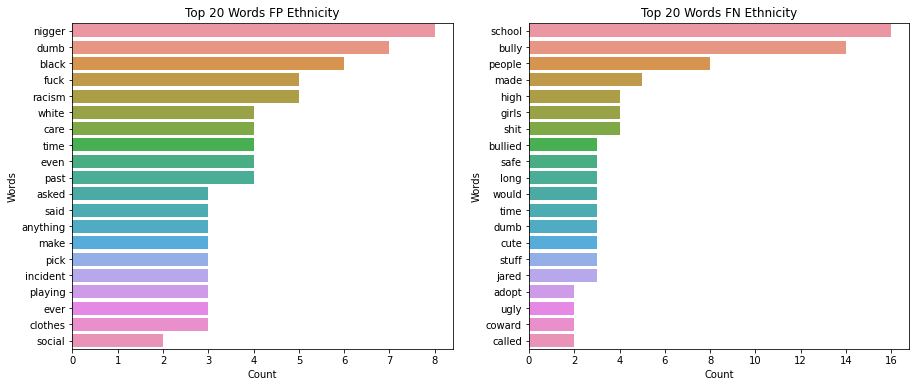

In [219]:
# Visualisasi FP dan FP
fig, ax =plt.subplots(1,2,figsize=(15,6))
sns.barplot(x='Count', y='Words', data =topFP_ethnicity_list2, orientation= 'horizontal', ax=ax[0]).set(title= 'Top 20 Words FP Ethnicity')
sns.barplot(x='Count', y='Words', data =topFN_ethnicity_list2, orientation= 'horizontal', ax=ax[1]).set(title= 'Top 20 Words FN Ethnicity')
plt.show

Dari infromasi diatas dapat disimpulkan bahwa : 
- Model akan salah prediksi FP jika tweet memiliki kata-kata nigger, dumb, fuck, black, racism
- Model akan salah prediksi FN jika tweet memiliki kata-kata school, bully, people, made, high

### 3. Karakteristik Salah Prediksi Kelas `gender`

Saya akan coba print top 20 kata untuk False Positif dan False Negatif

In [220]:
# Pembagian FP dan FN
gender_type_imp2_FP = gender_type_imp2[(gender_type_imp2['actual']!=0) &(gender_type_imp2['prediction']==0)]
gender_type_imp2_FN = gender_type_imp2[(gender_type_imp2['actual']==0) &(gender_type_imp2['prediction']!=0)]

In [221]:
# Top Words FP
topFP_gender = Counter([item for sublist in gender_type_imp2_FP['tweet_list'] for item in sublist])
topFP_gender_list2 = pd.DataFrame(topFP_gender.most_common(20))
topFP_gender_list2.columns = ['Words','Count']

# Top Words FN
topFN_gender = Counter([item for sublist in gender_type_imp2_FN['tweet_list'] for item in sublist])
topFN_gender_list2 = pd.DataFrame(topFN_gender.most_common(20))
topFN_gender_list2.columns = ['Words','Count']

<function matplotlib.pyplot.show(*args, **kw)>

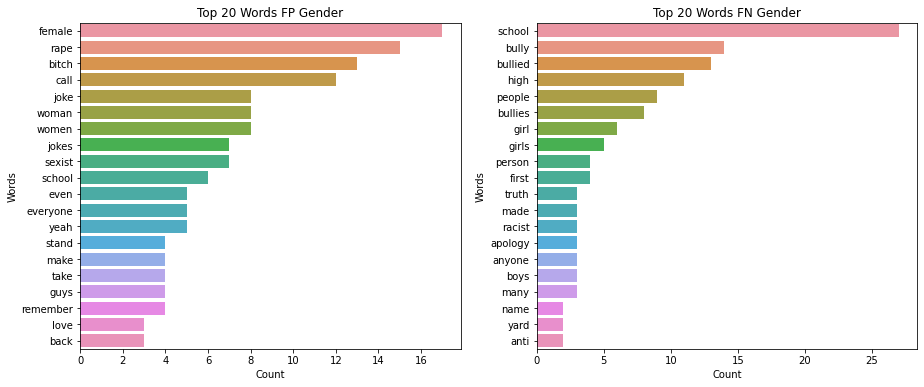

In [222]:
# Visualisasi FP dan FP
fig, ax =plt.subplots(1,2,figsize=(15,6))
sns.barplot(x='Count', y='Words', data =topFP_gender_list2, orientation= 'horizontal', ax=ax[0]).set(title= 'Top 20 Words FP Gender')
sns.barplot(x='Count', y='Words', data =topFN_gender_list2, orientation= 'horizontal', ax=ax[1]).set(title= 'Top 20 Words FN Gender')
plt.show

Dari infromasi diatas dapat disimpulkan bahwa : 
- Model akan salah prediksi FP jika tweet memiliki kata-kata female, rape, bitch, call, joke
- Model akan salah prediksi FN jika tweet memiliki kata-kata school, bully, bullied, high, people

### 4. Karakteristik Salah Prediksi Kelas `not_cyberbullying`

Saya akan coba print top 20 kata untuk False Positif dan False Negatif

In [223]:
# Pembagian FP dan FN
not_cyberbullying_type_imp2_FP = not_cyberbullying_type_imp2[(not_cyberbullying_type_imp2['actual']!=0) &(not_cyberbullying_type_imp2['prediction']==0)]
not_cyberbullying_type_imp2_FN = not_cyberbullying_type_imp2[(not_cyberbullying_type_imp2['actual']==0) &(not_cyberbullying_type_imp2['prediction']!=0)]

In [224]:
# Top Words FP
topFP_not_cyberbullying = Counter([item for sublist in not_cyberbullying_type_imp2_FP['tweet_list'] for item in sublist])
topFP_not_cyberbullying_list2 = pd.DataFrame(topFP_not_cyberbullying.most_common(20))
topFP_not_cyberbullying_list2.columns = ['Words','Count']

# Top Words FN
topFN_not_cyberbullying = Counter([item for sublist in not_cyberbullying_type_imp2_FN['tweet_list'] for item in sublist])
topFN_not_cyberbullying_list2 = pd.DataFrame(topFN_not_cyberbullying.most_common(20))
topFN_not_cyberbullying_list2.columns = ['Words','Count']

<function matplotlib.pyplot.show(*args, **kw)>

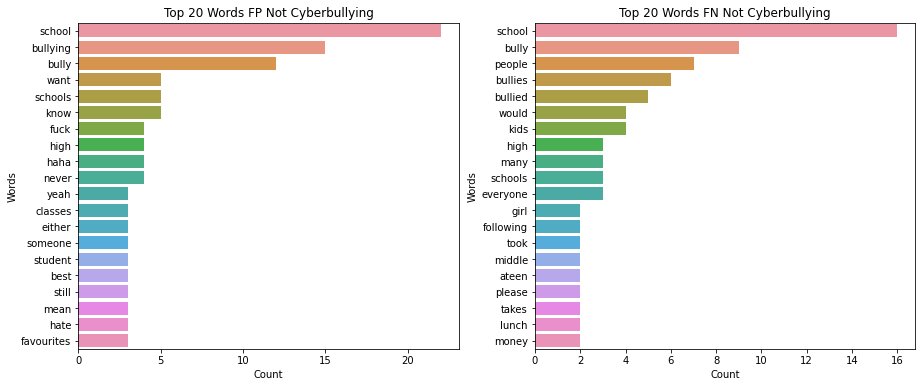

In [225]:
# Visualisasi FP dan FP
fig, ax =plt.subplots(1,2,figsize=(15,6))
sns.barplot(x='Count', y='Words', data =topFP_not_cyberbullying_list2, orientation= 'horizontal', ax=ax[0]).set(title= 'Top 20 Words FP Not Cyberbullying')
sns.barplot(x='Count', y='Words', data =topFN_not_cyberbullying_list2, orientation= 'horizontal', ax=ax[1]).set(title= 'Top 20 Words FN Not Cyberbullying')
plt.show

Dari infromasi diatas dapat disimpulkan bahwa : 
- Model akan salah prediksi FP jika tweet memiliki kata-kata school, bullying, bully, want, schools
- Model akan salah prediksi FN jika tweet memiliki kata-kata school, bully, people, bullies, bullied, would

### 5. Karakteristik Salah Prediksi Kelas `other_cyberbullying`

Saya akan coba print top 20 kata untuk False Positif dan False Negatif

In [226]:
# Pembagian FP dan FN
other_cyberbullying_type_imp2_FP = other_cyberbullying_type_imp2[(other_cyberbullying_type_imp2['actual']!=0) &(other_cyberbullying_type_imp2['prediction']==0)]
other_cyberbullying_type_imp2_FN = other_cyberbullying_type_imp2[(other_cyberbullying_type_imp2['actual']==0) &(other_cyberbullying_type_imp2['prediction']!=0)]

In [227]:
# Top Words FP
topFP_other_cyberbullying = Counter([item for sublist in other_cyberbullying_type_imp2_FP['tweet_list'] for item in sublist])
topFP_other_cyberbullying_list2 = pd.DataFrame(topFP_other_cyberbullying.most_common(20))
topFP_other_cyberbullying_list2.columns = ['Words','Count']

# Top Words FN
topFN_other_cyberbullying = Counter([item for sublist in other_cyberbullying_type_imp2_FN['tweet_list'] for item in sublist])
topFN_other_cyberbullying_list2 = pd.DataFrame(topFN_other_cyberbullying.most_common(20))
topFN_other_cyberbullying_list2.columns = ['Words','Count']

<function matplotlib.pyplot.show(*args, **kw)>

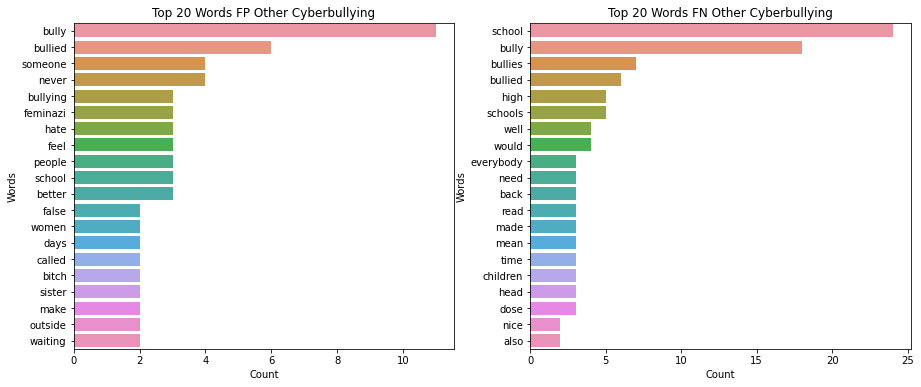

In [228]:
# Visualisasi FP dan FP
fig, ax =plt.subplots(1,2,figsize=(15,6))
sns.barplot(x='Count', y='Words', data =topFP_other_cyberbullying_list2, orientation= 'horizontal', ax=ax[0]).set(title= 'Top 20 Words FP Other Cyberbullying')
sns.barplot(x='Count', y='Words', data =topFN_other_cyberbullying_list2, orientation= 'horizontal', ax=ax[1]).set(title= 'Top 20 Words FN Other Cyberbullying')
plt.show

Dari infromasi diatas dapat disimpulkan bahwa : 
- Model akan salah prediksi FP jika tweet memiliki kata-kata bully, bullied, someone, never, bullying
- Model akan salah prediksi FN jika tweet memiliki kata-kata school, bully, bullies, bullied, high

### 6. Karakteristik Salah Prediksi Kelas `religion`

Saya akan coba print top 20 kata untuk False Positif dan False Negatif

In [229]:
# Pembagian FP dan FN
religion_type_imp2_FP = religion_type_imp2[(religion_type_imp2['actual']!=0) &(religion_type_imp2['prediction']==0)]
religion_type_imp2_FN = religion_type_imp2[(religion_type_imp2['actual']==0) &(religion_type_imp2['prediction']!=0)]

In [230]:
# Top Words FP
topFP_religion = Counter([item for sublist in religion_type_imp2_FP['tweet_list'] for item in sublist])
topFP_religion_list2 = pd.DataFrame(topFP_religion.most_common(20))
topFP_religion_list2.columns = ['Words','Count']

# Top Words FN
topFN_religion = Counter([item for sublist in religion_type_imp2_FN['tweet_list'] for item in sublist])
topFN_religion_list2 = pd.DataFrame(topFN_religion.most_common(20))
topFN_religion_list2.columns = ['Words','Count']

<function matplotlib.pyplot.show(*args, **kw)>

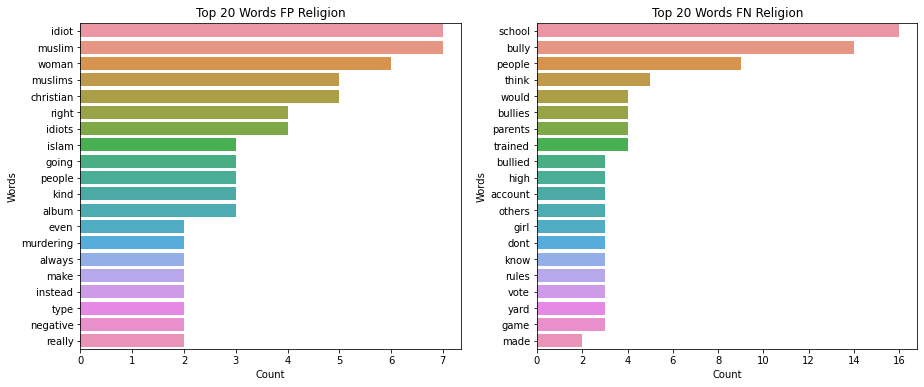

In [231]:
# Visualisasi FP dan FP
fig, ax =plt.subplots(1,2,figsize=(15,6))
sns.barplot(x='Count', y='Words', data =topFP_religion_list2, orientation= 'horizontal', ax=ax[0]).set(title= 'Top 20 Words FP Religion')
sns.barplot(x='Count', y='Words', data =topFN_religion_list2, orientation= 'horizontal', ax=ax[1]).set(title= 'Top 20 Words FN Religion')
plt.show

Dari infromasi diatas dapat disimpulkan bahwa : 
- Model akan salah prediksi FP jika tweet memiliki kata-kata idiot, muslim, woman, muslims, christian
- Model akan salah prediksi FN jika tweet memiliki kata-kata school, bully, people, think, would

# 12 - Model Comparation & Model Selection

Kemudian saya akan membandingkan keseluruhan model dan memilih model terbaik. Sebelumnya saya akan membuat *dataframe* untuk mempermudah perbandingan

In [283]:
# Train Evaluation

eval_training_df = pd.concat([pd.DataFrame(history_baseline_df.iloc[-1]).rename(columns={29 :'LSTM Baseline'}),pd.DataFrame(history_baseline2_df.iloc[-1]).rename(columns={29 :'GRU Baseline'}),pd.DataFrame(history_imp1_df.iloc[-1]).rename(columns={29 :'LSTM Improvement'}),pd.DataFrame(history_imp2_df.iloc[-1]).rename(columns={29 :'GRU Improvement (Transfer Learning)'})],axis=1).T
eval_training_df.round(2).sort_values(by='accuracy', ascending=False)

loss  accuracy  auc  val_loss  \
LSTM Improvement                     0.06      0.97  1.0      1.34   
GRU Improvement (Transfer Learning)  0.18      0.93  1.0      1.43   
LSTM Baseline                        1.79      0.17  0.5      1.79   
GRU Baseline                         1.79      0.17  0.5      1.79   

                                     val_accuracy  val_auc  
LSTM Improvement                             0.78     0.91  
GRU Improvement (Transfer Learning)          0.68     0.91  
LSTM Baseline                                0.16     0.50  
GRU Baseline                                 0.16     0.49

In [284]:
# Test Evaluation
eval_accu = [accuracy_score(y_test, y_pred_baseline),accuracy_score(y_test, y_pred_baseline2), accuracy_score(y_test, y_pred_imp1), accuracy_score(y_test, y_pred_imp2)]
eval_auc =[auc_baseline, auc_baseline2, auc_imp1, auc_imp2]
# Membuat Dataframe
eval_test_df = pd.DataFrame([eval_accu, eval_auc], index=['Accuracy','AUC'], columns=['LSTM Baseline', 'GRU Baseline', 'LSTM Improvement', 'GRU Improvement (Transfer Learning)']).T
eval_test_df.round(2).sort_values(by= 'Accuracy', ascending=False)

Accuracy   AUC
LSTM Improvement                         0.77  0.93
GRU Improvement (Transfer Learning)      0.66  0.91
LSTM Baseline                            0.17  0.50
GRU Baseline                             0.17  0.50

Dari hasil evaluasi *training* dan *test* maka **model terbaik adalah LSTM Improvement** karena :
- Model LSTM Improvement memiliki *score* yang tinggi terhadap semua *metrics* dibandingkan semua model
- Artinya secara bisnis, Model LSTM Improvement dapat mengklasifikasikan kelas *tweet* lebih baik dari pada model lainnya

# 13 - Model Saving

Selanjutnya adalah *save* model untuk persiapan *inference*

In [285]:
# Save Model
model_imp1.save('best_model')

# 14 - Model Inference

Inference dilakukan pada *notebook terpisah*. Selain itu *inference* juga di-lakukan melalui *deployment hugging face* 

**Link Hugging Face : https://huggingface.co/spaces/evanderin/P2M2_FTDS-RMT17_Evan_Derin_Ihsanudin**

# 15 - Conclusion

Kesimpulan dari penelitian di-atas adalah


- Seiring dengan penggunaan media sosial yang semakin lazim di setiap kelompok usia, sebagian besar masyarakat mengandalkan media sosial untuk komunikasi sehari-hari. Dengan penggunaan media sosial yang semakin *intens* maka menyebabkan tingkat *cyberbullying* meningkat serta dapat berdampak pada siapapun. 87% dari korban *cyberbullying* mengalami penurunan di nilai akademik dan beberapa mengalami depresi hingga keinginan untuk bunuh diri. Oleh karena itu perlu adanya tindakan untuk mencegah *cyberbullying*, salah satunya dengan mendeteksi tweet yang menandakan adanya *cyberbullying* dan memberi *redflag* pada tweet tersebut. **Sehingga dibutuhkan model klasifikasi tweet yang optimal**

- Sebelum membuat model klasifikasi yang optimal, saya perlu mengetahui karakteristik dari tweet. Berikut hasil eksplorasi karakteristik tweet untuk setiap kategori :
    1. Tweet memiliki rata-rata 2 kalimat dan 28 kata
    2. Rata-Rata kata pada `not_bullying` cenderung lebih rendah dari pada kategori lain (berkisar pada 17 kata)
    3. Rata-Rata kata pada `religion` lebih tinggi dari pada kategori lain dengan kisaran 39 kata
    4. Berdasarkan wordcloud, untuk tipe tweet `not_cyberbullying` banyak fokus terhadap kata yang berhubungan dengan kehidupan sehari-hari seperti 
school, time, people, love, team, class dll
    5. Berdasarkan wordcloud, untuk tipe tweet `gender` banyak fokus terhadap kata yang berhubungan dengan wanita seperti female, women, feminist, sexist dll. Dengan kata lain tweet gender ini sepertinya banyak ditujukan untuk kaum perempuan
    6. Berdasarkan wordcloud, untuk tipe tweet `religion` banyak fokus terhadap kata yang berhubungan dengan agama islam dan kristen seperti muslim, christian, islamic, pakistan dll
    7. Berdasarkan wordcloud, untuk tipe tweet `other_cyberbullying` kata-kata nya terlalu random akan tetapi di-dominasi oleh kata yang mengandung hinaan seperti idiot dll
    8. Berdasarkan wordcloud, untuk tipe tweet `age` banyak fokus terhadap kata yang berhubungan dengan sekolah seperti teacher, kids, high school, middle school dll
    9. Berdasarkan wordcloud, untuk tipe tweet `ethnicity` banyak fokus terhadap istilah lain dari suatu suku dan warna kulit seperti black, white, nigger dll

- Setelah mengetahui karakteristik dari tweet saya melakukan *training* pada 2 model (LSTM & GRU) kemudian melakukan *improvement* pada dua model tersebut. Kemudian dipilihlah model yang paling optimal yaitu LSTM Improvement. Berikut kelebihan dan kelemahan model :

    Kelebihan
    1. Memiliki akurasi diatas *acceptable score* yaitu 77% (sudah diata 70%) yang artinya model ini dapat mengklasifikasikan *tweet* dengan baik
    2. Model ini tidak dipengaruhi *treshold*
    3. Selain kelas `not_cyberbullying` dan `cyberbullying` kesalahan prediksi cukup rendah (pada kisaran 100 tweet kebawah. Notes : total dataset adalah 44.000 tweet)

    Kelemahan
    1. Model kurang akurat dalam memprediksi kelas `not_cyberbullying` dan kelas `cyberbullying`
    2. Memiliki waktu *training* yang cukup lama jika ingin meng-update data

- Untuk *Continuous Improvement* yang bisa dilakukan adalah :

   1. Untuk *improvement model*, bisa dilakukan pengurangan *vocabulary* pada kata-kata yang sangat umum dan dapat digunakan untuk ke 5 jenis *bullying* seperti *fucking* dll. Intinya kata yang tidak memiliki *power* untuk mengklasifikasikan tweet ke suatu kelas *bullying* perlu dihapus dari *vocabulary*
   2. Menambahkan data train dummy untuk kata-kata yang hurufnya diganti angka. Karena kata tersebut tidak dapat terdeteksi oleh model sehingga tweet tersebut dapat lolos dari deteksi
   3. Pemerintah/Bagian IT bisa melakukan blokir terhadap kata-kata yang sering digunakan untuk cyberbullying. Pemblokiran bisa menggunakan 2 sistem. Yang pertama bisa melakukan blokir universal, artinya semua user twitter tidak dapat menggunakan kata tersebut. Yang kedua, bisa blokir kata-kata tersebut untuk akun yang tidak diverifikasi identitasnya/akun palsu. Karena biasanya *cyberbullying* dilakukan di akun palsu
   4. Melakukan sensor terhadap tweet *bulltying* dan memberikan sistem notifikasi jika ada Direct Message yang masuk kategori *bullying*. Jadi kata yang termasuk kategori *bullying* akan otomatis di-sensor dan jika ada Direct Message yang masuk kategori *bullying* maka akan ada notifikasi dari sistem untuk tidak membaca pesan tersebut